In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import tensorboard
tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions

2022-11-04 19:05:33.803854: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))
tf.config.list_physical_devices('GPU')
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

SUCCESS: Found GPU: /device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16585856480189249296
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10564996992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9123790850128803930
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5"
]


2022-11-04 19:00:27.399979: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 19:00:27.400601: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-04 19:00:27.403910: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-04 19:00:27.450958: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.635GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-11-04 19:00:27.451004: I tensorflow/stream_executor/platf

# 1D generation

## Experiment 1
We generate from a multiplicative Y = AX.  
A is a gamma distribution with alpha = 3, beta = 0.5  
X is a inverse gamma distribution with alpha = 2.5, beta = 0.6  
The prior is InvGamma with alpha=2.5, beta=1   
The posterior is InvGamma with alpha = 3, beta learnable function of samples y  
The likelihood is a gamma distribution with alpha = 3 , beta learnable function of samples y  

In [5]:
encoded_size = 1
input_shape =(1,)
nbparamsl = 2
nbparamsobs = 2


In [3]:
A = tfd.Gamma(concentration = 3.0, rate=0.5).sample(1000)
X = tfd.InverseGamma(concentration =2.5, scale = 0.6 ).sample(1000)

Y=A*X
train_dataset = Y[:250]
train_dataset = tf.reshape(train_dataset,[250,1])
eval_dataset = Y[250:]
eval_dataset=tf.reshape(eval_dataset,[750,1])
print(eval_dataset)

2022-10-14 07:46:05.557559: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


tf.Tensor(
[[7.35540986e-01]
 [1.98601878e+00]
 [1.56809258e+00]
 [1.14072335e+00]
 [1.25448751e+00]
 [1.01582456e+00]
 [1.20378888e+00]
 [1.24075489e+01]
 [1.22212863e+00]
 [5.85153532e+00]
 [6.77504158e+00]
 [3.84154081e+00]
 [1.28136957e+00]
 [4.12812233e+00]
 [3.35763073e+00]
 [1.32601893e+00]
 [3.78969026e+00]
 [7.58466816e+00]
 [3.82095909e+00]
 [2.35016704e+00]
 [8.21354091e-01]
 [1.81578481e+00]
 [1.31022561e+00]
 [2.13275480e+00]
 [3.42818999e+00]
 [5.82192838e-01]
 [1.29052043e+00]
 [8.73822749e-01]
 [2.72970223e+00]
 [9.77765262e-01]
 [7.60838079e+00]
 [1.45245898e+00]
 [4.67293882e+00]
 [9.70233679e-01]
 [2.88944626e+00]
 [4.17358589e+00]
 [8.10578287e-01]
 [1.63072205e+00]
 [1.23950136e+00]
 [1.65353191e+00]
 [1.16182575e+01]
 [3.80990219e+00]
 [8.63065362e-01]
 [9.83483434e-01]
 [2.86428142e+00]
 [7.78969526e-01]
 [1.17153454e+00]
 [2.06002960e+01]
 [1.30239022e+00]
 [1.86163545e+00]
 [2.69400930e+00]
 [5.86361349e-01]
 [3.68806899e-01]
 [1.91245830e+00]
 [7.04071641e-01]

/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


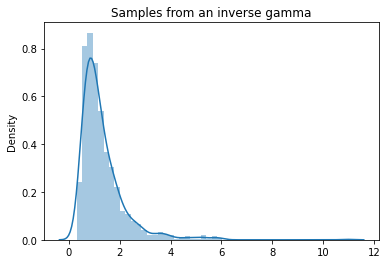

In [95]:
import inspect
#inspect.getargspec(tfd.InverseGamma)
invG = tfd.InverseGamma(concentration = 4, scale = 4)
samples = invG.sample(1000)

sns.distplot(samples)
plt.title("Samples from an inverse gamma")
plt.show()


In [6]:
prior =tfd.InverseGamma(concentration =2.5, scale = 1 )

In [118]:
tfpl = tfp.layers
encoder = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(1,
               activation=None),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
    tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.InverseGamma(
        concentration=3, scale=t),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior)),
])

In [119]:
c=tf.constant([[1.0],[2.0]])
print(encoder(c))
[print(np.squeeze(w.numpy())) for w in encoder.weights]

tfp.distributions._TensorCoercible("sequential_8_distribution_lambda_9_tensor_coercible", batch_shape=[2, 1], event_shape=[], dtype=float32)
1.272061
0.0


[None, None]

In [133]:
decoder = tfk.Sequential([
    tfkl.Dense(5, use_bias=True, activation='relu'),
    tfkl.Dense(5, use_bias=True, activation='relu'),
    tfkl.Dense(1, use_bias=True),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
    tfpl.DistributionLambda(
    make_distribution_fn=lambda v: tfd.Gamma(
        concentration=3, rate=v)),
 #   convert_to_tensor_fn=lambda s: s.sample),
])

In [134]:
c=tf.constant([[1.0],[2.4]])
print(decoder(c))
[print(np.squeeze(w.numpy())) for w in decoder.weights]

tfp.distributions._TensorCoercible("sequential_10_distribution_lambda_11_tensor_coercible", batch_shape=[2, 1], event_shape=[], dtype=float32)
[ 0.20731306  0.6692159   0.9966419  -0.6877501   0.5273528 ]
[0. 0. 0. 0. 0.]
[[ 0.7150396  -0.7224742  -0.48862743  0.05529433 -0.09209478]
 [ 0.30872715  0.60687745 -0.6542005   0.04341304 -0.4448439 ]
 [-0.47304058  0.37507927 -0.18101865 -0.7659674  -0.04890776]
 [ 0.7609724   0.23689449 -0.08099395 -0.28638867  0.24504328]
 [-0.09517008 -0.15877694 -0.0993861   0.04263318 -0.6710544 ]]
[0. 0. 0. 0. 0.]
[ 0.28419447 -0.4424882  -0.6236043  -0.34777927 -0.8560598 ]
0.0


[None, None, None, None, None, None]

In [135]:
vae = tfk.Model(inputs=encoder.inputs,
                outputs=decoder(encoder.outputs))
print(vae.output_shape)

(None, 1)


In [195]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-5),
            loss=negative_log_likelihood)

In [196]:
vae.fit(train_dataset,train_dataset,batch_size=32,epochs=100)


Epoch 1/100
24/24 [==============================] - 1s 5ms/step - loss: 2.0717
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0623
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0630
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0606
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0752
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0691
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0733
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0810
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 2.0722
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 2.0797
Epoch 11/100
24/24 [==============================] - 0s 3ms/step - loss: 2.0696
Epoch 12/100
24/24 [==============================] - 0s 5ms/step - loss: 2.0695
Epoch 13/100
24/24 [=================

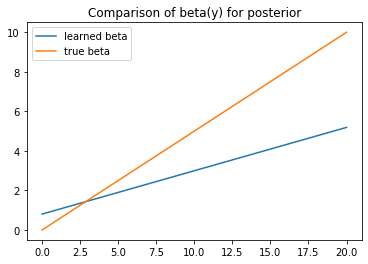

In [189]:
x =tf.linspace(
    0.001, 20, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)

beta_y = encoder(x).scale
plt.figure()
plt.title("Comparison of beta(y) for posterior")
plt.plot(x,beta_y,label='learned beta')
plt.plot(x,0.5*x, label = 'true beta')
plt.legend(['learned beta','true beta'])


<Figure size 432x288 with 0 Axes>

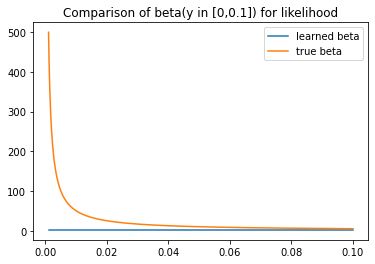

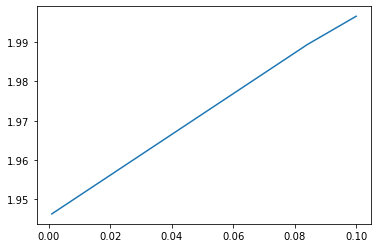

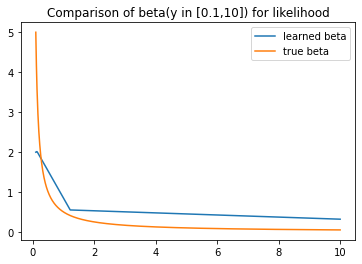

<Figure size 432x288 with 0 Axes>

In [190]:
x =tf.linspace(
    0.001, 0.1, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)
beta_x = decoder(x).rate
plt.figure()
plt.title("Comparison of beta(y in [0,0.1]) for likelihood")
plt.plot(x,beta_x,label='learned beta')
plt.plot(x,0.5/x, label = 'true beta')
plt.legend(['learned beta','true beta'])
plt.figure()
plt.plot(x,beta_x,label='learned beta')
x =tf.linspace(
    0.1, 10, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)
beta_x = decoder(x).rate
plt.figure()
plt.title("Comparison of beta(y in [0.1,10]) for likelihood")
plt.plot(x,beta_x,label='learned beta')
plt.plot(x,0.5/x, label = 'true beta')
plt.legend(['learned beta','true beta'])
plt.figure()


(1000,)
(1000,)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


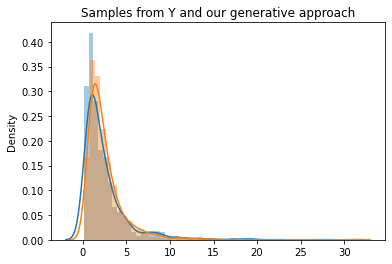

In [197]:
#Comparaison entre la densité de Y et de notre modèle génératif

samples_y = Y
print(samples_y.shape)
X_gen = prior.sample((1000,1))
samples_y_gen = tf.reshape(decoder(X_gen),(1000,))
print(samples_y_gen.shape)
sns.distplot(samples_y)
sns.distplot(samples_y_gen)
plt.title("Samples from Y and our generative approach")
plt.show()



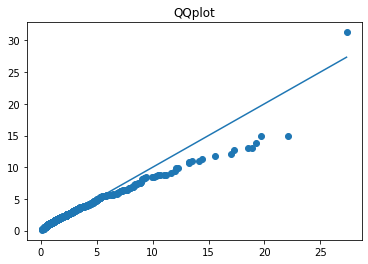

In [198]:

plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_y),tf.sort(samples_y_gen))
plt.plot(tf.sort(samples_y),tf.sort(samples_y))

## Experiment 2
We generate from a multiplicative Y = AX.  
A is a gamma distribution with alpha = 3, beta = 0.5  
X is a inverse gamma distribution with alpha = 2.5, beta = 0.6  
The prior is InvGamma with alpha=2.5, beta=1   
The posterior is InvGamma with alpha constant learnable , beta learnable function of samples y  
The likelihood is a gamma distribution with alpha constant, beta learnable function of samples y  

In [129]:
zeros_traindataset=tf.zeros(train_dataset.shape)
print(zeros_traindataset.shape)

(750, 1)


In [160]:
Y_input = tfk.Input(
    shape=[1], name="Y_train"
)  
zeros_input = tfk.Input([1], name="Zeros_train")
beta_layer = tfkl.Dense(1,activation=None,use_bias = False)(Y_input)
alpha_layer = tfkl.Dense(1,use_bias=True,activation=None, bias_initializer=tfk.initializers.Ones()
)(zeros_input)
alpha_layer = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(alpha_layer)
beta_layer = tfkl.Lambda(lambda x: tf.abs(x)+0.001,name = 'inv_gamma_beta_posterior')(beta_layer)
alpha_beta = tfkl.Concatenate()([alpha_layer,beta_layer])
posterior = tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.InverseGamma(
        concentration=t[... , 0], scale=t[...,1]),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior),
)(alpha_beta)
posterior = tfkl.Reshape(target_shape=[1])(posterior) 
print(posterior.shape)
encoder2 = tfk.Model(
    inputs=[Y_input,zeros_input],
    outputs=[posterior, alpha_layer],
)


(None, 1)


In [161]:
encoder2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Zeros_train (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 Y_train (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 1)            2           ['Zeros_train[0][0]']            
                                                                                                  
 dense_10 (Dense)               (None, 1)            1           ['Y_train[0][0]']                
                                                                                            

In [162]:
post_input = tfk.Input(
    shape=[1], name="post_input"
)  
alpha_input = tfk.Input([1], name="alpha_input")

beta_deco = tfkl.Dense(5, use_bias=True, activation='relu')(post_input)
beta_deco = tfkl.Dense(5, use_bias=True, activation='relu')(beta_deco)
beta_deco = tfkl.Dense(1, use_bias=True)(beta_deco)
beta_deco = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(beta_deco)
alpha_beta = tfkl.Concatenate()([alpha_input,beta_deco])
out = tfpl.DistributionLambda(
make_distribution_fn=lambda v: tfd.Gamma(
        concentration=v[...,0], rate=v[...,1]),       
)(alpha_beta)
decoder2 = tfk.Model(
    inputs=[post_input,alpha_input],
    outputs=out
)
 #   convert_to_tensor_fn=lambda s: s.sample),


In [163]:
decoder2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 post_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 5)            10          ['post_input[0][0]']             
                                                                                                  
 dense_13 (Dense)               (None, 5)            30          ['dense_12[0][0]']               
                                                                                                  
 dense_14 (Dense)               (None, 1)            6           ['dense_13[0][0]']               
                                                                                            

In [21]:
vae2 = tfk.Model(inputs=encoder2.inputs,
                outputs=decoder2(encoder2.outputs))
print(vae2.output_shape)

(None,)


In [25]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae2.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [26]:
c=tf.constant([[1.0],[2.0]])
z = tf.constant([[0.0],[0.0]])
print(encoder2([c,z]))
[print(np.squeeze(w.numpy())) for w in encoder2.weights]

[<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[12.692244 ],
       [ 2.6507733]], dtype=float32)>, <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.002996],
       [1.002996]], dtype=float32)>]
-0.747965
1.0019959
-0.3795797


[None, None, None]

In [27]:
vae2.fit(
    {"Y_train" : train_dataset, "Zeros_train" : zeros_traindataset},
    train_dataset,
    validation_data = ((eval_dataset,tf.zeros(eval_dataset.shape)),eval_dataset),
         batch_size=16,epochs=100)


Epoch 1/100
47/47 [==============================] - 2s 17ms/step - loss: 5.0774 - val_loss: 4.9313
Epoch 2/100
47/47 [==============================] - 0s 8ms/step - loss: 5.4375 - val_loss: 6.1019
Epoch 3/100
47/47 [==============================] - 0s 9ms/step - loss: 4.7882 - val_loss: 4.5578
Epoch 4/100
47/47 [==============================] - 0s 8ms/step - loss: 7.6310 - val_loss: 5.1012
Epoch 5/100
47/47 [==============================] - 0s 7ms/step - loss: 4.7691 - val_loss: 4.3352
Epoch 6/100
47/47 [==============================] - 0s 8ms/step - loss: 4.3132 - val_loss: 4.0533
Epoch 7/100
47/47 [==============================] - 1s 12ms/step - loss: 4.6879 - val_loss: 4.6163
Epoch 8/100
47/47 [==============================] - 0s 9ms/step - loss: 4.5272 - val_loss: 4.5767
Epoch 9/100
47/47 [==============================] - 0s 7ms/step - loss: 4.4469 - val_loss: 4.2594
Epoch 10/100
47/47 [==============================] - 0s 7ms/step - loss: 4.4747 - val_loss: 4.6441
Epoch 1

In [28]:
layer_name = 'inv_gamma_beta_posterior'
intermediate_layer_model = tfk.Model(inputs=encoder2.input,
                                       outputs=encoder2.get_layer(layer_name).output)

tf.Tensor([1.4500233], shape=(1,), dtype=float32)


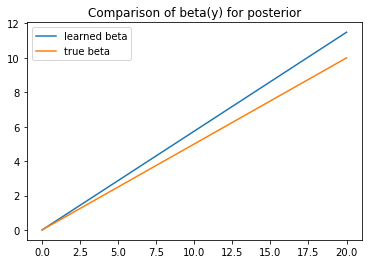

In [29]:
x =tf.linspace(
    0.001, 20, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)

x_tot = [x,tf.zeros(x.shape)]
beta_y = intermediate_layer_model(x_tot)
print(encoder2(x_tot)[1][0])

plt.figure()
plt.title("Comparison of beta(y) for posterior")
plt.plot(x,beta_y,label='learned beta')
plt.plot(x,0.5*x, label = 'true beta')
plt.legend(['learned beta','true beta'])


<Figure size 432x288 with 0 Axes>

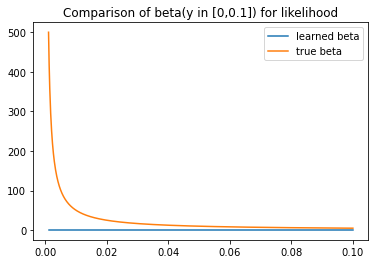

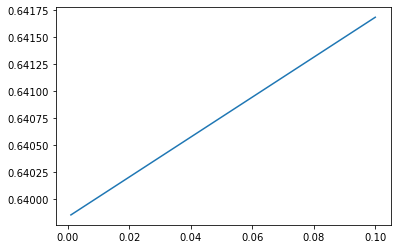

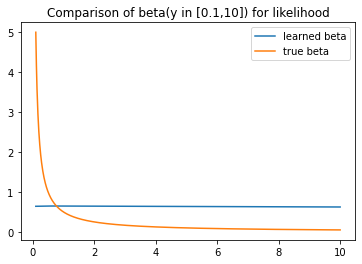

<Figure size 432x288 with 0 Axes>

In [30]:
x =tf.linspace(
    0.001, 0.1, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)
alpha_y = encoder2(x_tot)[1]
beta_x = decoder2([x,alpha_y]).rate
plt.figure()
plt.title("Comparison of beta(y in [0,0.1]) for likelihood")
plt.plot(x,beta_x,label='learned beta')
plt.plot(x,0.5/x, label = 'true beta')
plt.legend(['learned beta','true beta'])
plt.figure()
plt.plot(x,beta_x,label='learned beta')
x =tf.linspace(
    0.1, 10, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)
beta_x = decoder2([x,alpha_y]).rate
plt.figure()
plt.title("Comparison of beta(y in [0.1,10]) for likelihood")
plt.plot(x,beta_x,label='learned beta')
plt.plot(x,0.5/x, label = 'true beta')
plt.legend(['learned beta','true beta'])
plt.figure()

(1000,)
(1000,)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


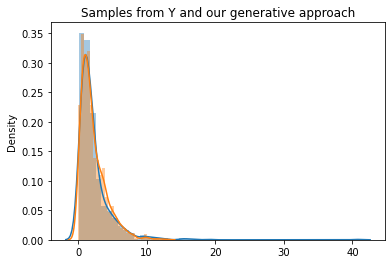

In [31]:
#Comparaison entre la densité de Y et de notre modèle génératif

samples_y = Y
print(samples_y.shape)
X_gen = prior.sample((1000,1))
samples_y_gen = tf.reshape(decoder2([X_gen,alpha_y]),(1000,))
print(samples_y_gen.shape)
sns.distplot(samples_y)
sns.distplot(samples_y_gen)
plt.title("Samples from Y and our generative approach")
plt.show()



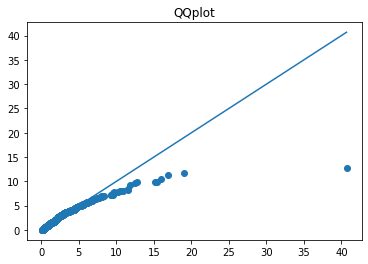

In [32]:
plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_y),tf.sort(samples_y_gen))
plt.plot(tf.sort(samples_y),tf.sort(samples_y))

In [33]:
[print(np.squeeze(w.numpy())) for w in encoder2.weights]

-0.747965
1.4490232
-0.57445985


[None, None, None]

# Experiment 3

We generate from a multiplicative Y = AX.  
A is a gamma distribution with alpha = 3, beta = 0.5  
X is a inverse gamma distribution with alpha = 2.5, beta = 0.6  
The prior is InvGamma with alpha=2.5, beta=1   
The posterior is InvGamma with alpha, beta learnable function of samples y  
The likelihood is a gamma distribution with alpha, beta learnable function of samples y  

In [57]:
encoder3 = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(5,
               activation='relu'),
    tfkl.Dense(5,
               activation='relu'),
    tfkl.Dense(2,
               activation=None,
              name = 'inv_gamma_beta_posterior'),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
])    

In [58]:
encoder3.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss='mean_absolute_error')

In [59]:
pre_target=np.zeros((train_dataset.shape[0],2))
pre_target[...,0] = pre_target[...,0] +1.5
pre_target[...,1] = pre_target[...,1] +1
encoder3.fit(train_dataset,pre_target,batch_size=16,epochs=100)

Epoch 1/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 5.4261e-04
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 5.6763e-04
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 6.3672e-04
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 7.2210e-04
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 6.8029e-04
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 8.9413e-04
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 4.7187e-04
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 7.5795e-04
Epoch 10/100
47/47 [==============================] - 0s 4ms/step - loss: 3.8525e-04
Epoch 11/100
47/47 [==============================] - 0s 4ms/step - loss: 5.2883e-04
Epoch 12/100
47/47 [==============================] - 0s 4ms/step - loss: 0.00

In [60]:
#Afin d'initialiser l'encoder3, on lui fait apprendre le résultat obtenu à l'aide de l'encoder 2
encoder3.add( tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.InverseGamma(
        concentration=t[...,0], scale=t[...,1]),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior)))
encoder3.add(tfkl.Reshape(target_shape=[1]))


In [61]:
encoder3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5)                 10        
                                                                 
 dense_24 (Dense)            (None, 5)                 30        
                                                                 
 inv_gamma_beta_posterior (D  (None, 2)                12        
 ense)                                                           
                                                                 
 lambda_8 (Lambda)           (None, 2)                 0         
                                                                 
 distribution_lambda_7 (Dist  ((None,),                0         
 ributionLambda)              (None,))                           
                                                                 
 reshape_3 (Reshape)         (None, 1)                

In [62]:
decoder3 = tfk.Sequential([
    tfkl.Dense(5, use_bias=True, activation='relu'),
    tfkl.Dense(5, use_bias=True, activation='relu'),
    tfkl.Dense(2, use_bias=True),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
    tfpl.DistributionLambda(
    make_distribution_fn=lambda v: tfd.Gamma(
        concentration=v[...,0], rate=v[...,1])),
 #   convert_to_tensor_fn=lambda s: s.sample),
])

In [63]:
decoder3(encoder3(train_dataset))

<tfp.distributions._TensorCoercible 'sequential_6_distribution_lambda_8_tensor_coercible' batch_shape=[750] event_shape=[] dtype=float32>

In [64]:
c=tf.constant([[1.0]])
print(decoder3(c))
decoder3.summary()

tfp.distributions._TensorCoercible("sequential_6_distribution_lambda_8_tensor_coercible", batch_shape=[1], event_shape=[], dtype=float32)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 5)                 10        
                                                                 
 dense_26 (Dense)            (None, 5)                 30        
                                                                 
 dense_27 (Dense)            (None, 2)                 12        
                                                                 
 lambda_9 (Lambda)           (None, 2)                 0         
                                                                 
 distribution_lambda_8 (Dist  ((None,),                0         
 ributionLambda)              (None,))                           
                                                

In [65]:

vae3 = tfk.Model(inputs=encoder3.inputs,
                outputs=decoder3(encoder3.outputs))
print(vae3.output_shape)

(None,)


In [68]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae3.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [69]:
vae3.fit(train_dataset,train_dataset,batch_size=16,epochs=100)


Epoch 1/100
47/47 [==============================] - 2s 4ms/step - loss: 3.2337
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 2.7384
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 2.8269
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: 2.6313
Epoch 5/100
47/47 [==============================] - 0s 5ms/step - loss: 2.6173
Epoch 6/100
47/47 [==============================] - 0s 5ms/step - loss: 2.2527
Epoch 7/100
47/47 [==============================] - 0s 5ms/step - loss: 2.3350
Epoch 8/100
47/47 [==============================] - 0s 5ms/step - loss: 2.3913
Epoch 9/100
47/47 [==============================] - 0s 5ms/step - loss: 2.2633
Epoch 10/100
47/47 [==============================] - 0s 5ms/step - loss: 2.3314
Epoch 11/100
47/47 [==============================] - 0s 5ms/step - loss: 2.1916
Epoch 12/100
47/47 [==============================] - 0s 5ms/step - loss: 2.1078
Epoch 13/100
47/47 [=================

In [72]:
layer_name = 'inv_gamma_beta_posterior'
intermediate_layer_model = tfk.Model(inputs=encoder3.input,
                                       outputs=encoder3.get_layer(layer_name).output)

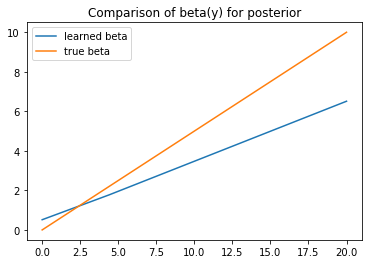

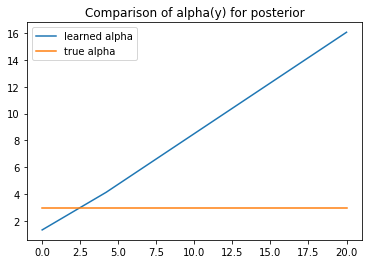

In [81]:
x =tf.linspace(
    0.001, 20, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)

x_tot = x
alpha_beta_y = intermediate_layer_model(x_tot)
alpha_y = alpha_beta_y[...,0]
beta_y = alpha_beta_y[...,1]

plt.figure()
plt.title("Comparison of beta(y) for posterior")
plt.plot(x,beta_y,label='learned beta')
plt.plot(x,0.5*x, label = 'true beta')
plt.legend(['learned beta','true beta'])
plt.figure()
plt.title("Comparison of alpha(y) for posterior")
plt.plot(x,alpha_y,label='learned alpha')
plt.plot(x,3+tf.zeros((1000,1)), label = 'true alpha')
plt.legend(['learned alpha','true alpha'])

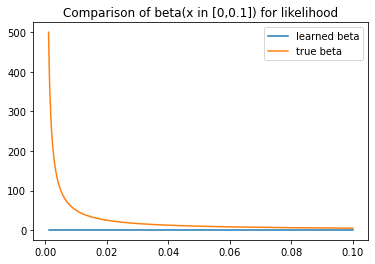

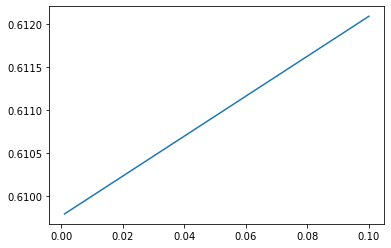

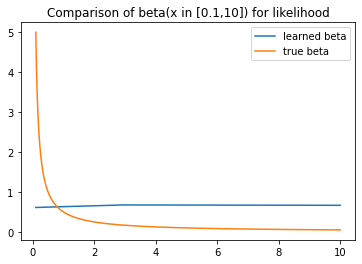

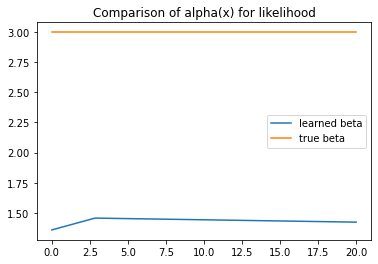

In [89]:
x =tf.linspace(
    0.001, 0.1, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)
beta_x = decoder3(x).rate
plt.figure()
plt.title("Comparison of beta(x in [0,0.1]) for likelihood")
plt.plot(x,beta_x,label='learned beta')
plt.plot(x,0.5/x, label = 'true beta')
plt.legend(['learned beta','true beta'])
plt.figure()
plt.plot(x,beta_x,label='learned beta')
x =tf.linspace(
    0.1, 10, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)
beta_x = decoder3(x).rate
plt.figure()
plt.title("Comparison of beta(x in [0.1,10]) for likelihood")
plt.plot(x,beta_x,label='learned beta')
plt.plot(x,0.5/x, label = 'true beta')
plt.legend(['learned beta','true beta'])
plt.figure()
alpha_x = decoder3(x_tot).concentration
plt.title("Comparison of alpha(x) for likelihood")
plt.plot(x_tot,alpha_x,label='learned alpha')
plt.plot(x_tot,3+tf.zeros((1000,1)), label = 'true alpha')
plt.legend(['learned beta','true beta'])

(1000,)
(1000,)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


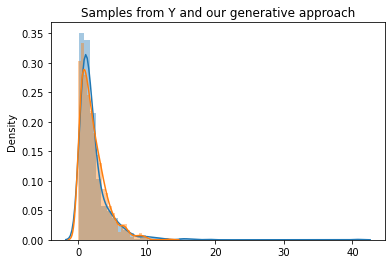

In [85]:
#Comparaison entre la densité de Y et de notre modèle génératif
samples_y = Y
X_gen = prior.sample((1000,1))
samples_y_gen = tf.reshape(decoder3(X_gen),(1000,))
sns.distplot(samples_y)
sns.distplot(samples_y_gen)
plt.title("Samples from Y and our generative approach")
plt.show()


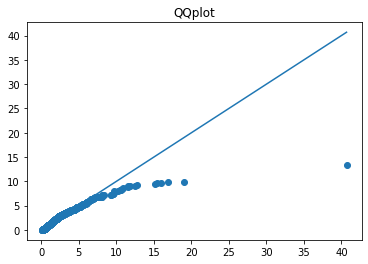

In [86]:
plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_y),tf.sort(samples_y_gen))
plt.plot(tf.sort(samples_y),tf.sort(samples_y))

## Experiment 4
We generate from a multiplicative Y = AX.  
A is a gamma distribution with alpha = 3, beta = 0.5  
X is a inverse gamma distribution with alpha = 2.5, beta = 0.6  
The prior is InvGamma with alpha hyperparameter, beta=1   
The posterior is InvGamma with alpha constant learnable , beta learnable function of samples y  
The likelihood is a gamma distribution with alpha constant, beta learnable function of samples y  

In [1]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
class NLL(tf.keras.metrics.Metric):
    def __init__(self, name='NLL', **kwargs):
        super(NLL, self).__init__(name=name, **kwargs)

    def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
    values = tf.cast(values, self.dtype)
    if sample_weight is not None:
      sample_weight = tf.cast(sample_weight, self.dtype)
      values = tf.multiply(values, sample_weight)
    self.true_positives.assign_add(tf.reduce_sum(values))

  def result(self):
    return self.true_positives

  def reset_states(self):
    self.true_positives.assign(0)

In [61]:
HP_alpha_prior = hp.HParam('num_units', hp.Discrete([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]))

negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

METRIC_ACCURACY = 'kullback_leibler_divergence'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_alpha_prior],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='NLL')],
  )



In [66]:
def train_test_model(hparams):
    prior =tfd.InverseGamma(concentration = hparams[HP_alpha_prior], scale = 1 )
    encoder4 = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(5,
               activation='relu'),
    tfkl.Dense(5,
               activation='relu'),
    tfkl.Dense(2,
               activation=None,
              name = 'inv_gamma_beta_posterior'),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
])    
    encoder4.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss='mean_absolute_error')
    pre_target=np.zeros((train_dataset.shape[0],2))
    pre_target[...,0] = pre_target[...,0] +1.5
    pre_target[...,1] = pre_target[...,1] +1
    encoder4.fit(train_dataset,pre_target,batch_size=16,epochs=10)
    encoder4.add( tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.InverseGamma(
        concentration=t[...,0], scale=t[...,1]),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior)))
    encoder4.add(tfkl.Reshape(target_shape=[1]))
    decoder4 = tfk.Sequential([
        tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(5, use_bias=True, activation='relu'),
    tfkl.Dense(5, use_bias=True, activation='relu'),
    tfkl.Dense(2, use_bias=True),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
    tfpl.DistributionLambda(
    make_distribution_fn=lambda v: tfd.Gamma(
        concentration=v[...,0], rate=v[...,1])),
 #   convert_to_tensor_fn=lambda s: s.sample),
])  
    vae4 = tfk.Model(inputs=encoder4.inputs,
                outputs=decoder4(encoder4.outputs))
    vae4.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3), loss=negative_log_likelihood)
    vae4.fit(train_dataset,train_dataset,batch_size=16,epochs=100)
    print(vae4.evaluate(eval_dataset, eval_dataset))
    accuracy = vae4.evaluate(eval_dataset, eval_dataset)
    return accuracy
    
  



In [67]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)


In [68]:
#vae4.evaluate(eval_dataset, eval_dataset)

In [69]:
session_num = 0

for alpha_prior in HP_alpha_prior.domain.values:
    hparams = {
          HP_alpha_prior: alpha_prior,
      }
    run_name = "run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    run('logs/hparam_tuning/' + run_name, hparams)
    session_num += 1


--- Starting trial: run-0
{'num_units': 1.5}
Epoch 1/10
47/47 [==============================] - 0s 3ms/step - loss: 0.9088
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 0.7507
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 0.6107
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4965
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.3851
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.2738
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.1864
Epoch 8/10
47/47 [==============================] - 0s 3ms/step - loss: 0.1294
Epoch 9/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 10/10
47/47 [==============================] - 0s 3ms/step - loss: 0.0367
Epoch 1/100
47/47 [==============================] - 2s 6ms/step - loss: 2.5635
Epoch 2/100
47/47 [==============================] - 0s 6ms/step - loss: 2.2868
Epoc

## Experiment 5
Bimodal target distribution.  
Y is a mixture of two inverse gamma distributions  IG1 and IG2.  
IG1 has $\alpha=1$, $\beta=1$, IG2 has $\alpha=1$, $\beta=3$.  
$Y = \pi IG1 + (1-\pi)IG2$ with $\pi$ Bernoulli of parameters 0.3.


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


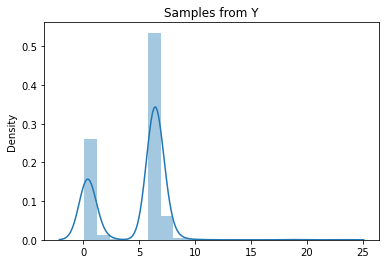

In [228]:
Ber = tfd.Bernoulli(probs=0.3, dtype ='float').sample(1000) 
IG1 = tfd.InverseGamma(concentration =3, scale = 1 ).sample(1000)
IG2 = tfd.InverseGamma(concentration =3, scale = 1 ).sample(1000)
Y = IG1*Ber +(6+IG2)*(1-Ber)

Y_sort=tf.sort(Y)
sns.distplot(Y_sort)
plt.title("Samples from Y")
plt.show()
train_dataset = Y[:750]
train_dataset = tf.reshape(train_dataset,[750,1])
eval_dataset = Y[750:]
eval_dataset = tf.reshape(train_dataset,[750,1])

In [229]:
prior = tfd.InverseGamma(concentration =3, scale = 1 )

In [230]:
encoder3 = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(4,
               activation='relu'),
    tfkl.Dense(8,
               activation='relu'),
    tfkl.Dense(8,
               activation='relu'),
    tfkl.Dense(2,
               activation=None,
              name = 'inv_gamma_beta_posterior'),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
])    


In [231]:
encoder3.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss='mean_absolute_error')

In [232]:
pre_target=np.zeros((train_dataset.shape[0],2))
pre_target[...,0] = pre_target[...,0] +3
pre_target[...,1] = pre_target[...,1] +1
#pre_target[...,1] = pre_target[...,1] +6
#pre_target[...,1] = pre_target[...,1] +0.2
encoder3.fit(train_dataset,pre_target,batch_size=16,epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 4ms/step - loss: 1.7880
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 1.3398
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 1.1493
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.9663
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.6751
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.3610
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 0.2594
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 0.2055
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1490
Epoch 10/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0853
Epoch 11/100
18/47 [==========>...................] - ETA: 0s - loss: 0.0341

KeyboardInterrupt: 

In [233]:
encoder3.add( tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.InverseGamma(
        concentration=t[...,0], scale=t[...,1]),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior)))
encoder3.add(tfkl.Reshape(target_shape=[1]))


In [234]:
encoder3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 4)                 8         
                                                                 
 dense_73 (Dense)            (None, 8)                 40        
                                                                 
 dense_74 (Dense)            (None, 8)                 72        
                                                                 
 inv_gamma_beta_posterior (D  (None, 2)                18        
 ense)                                                           
                                                                 
 lambda_20 (Lambda)          (None, 2)                 0         
                                                                 
 distribution_lambda_21 (Dis  ((None,),                0         
 tributionLambda)             (None,))               

In [241]:
decoder3 = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(4, use_bias=True, activation='relu'),
    tfkl.Dense(8, use_bias=True, activation='relu'),
    tfkl.Dense(8, use_bias=True, activation='relu'),
    tfkl.Dense(4, use_bias=True),
    tfkl.Lambda(lambda x: tf.abs(x)+0.001),
])

In [191]:
decoder3.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss='mean_absolute_error')

In [192]:

def esc_alpha(x):
    if x<0.3:
        return 0.5
    else :
        return 8
    

def esc_beta(x):
    if x<0.3:
        return 50
    else :
        return 1

pre_target_decoder = np.zeros((train_dataset.shape[0],2))
pre_target_decoder[...,0] = tf.map_fn(esc_alpha,train_dataset)
pre_target_decoder[...,1] = tf.map_fn(esc_beta,train_dataset)

In [193]:
decoder3.fit(train_dataset,pre_target_decoder,batch_size=16,epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 4ms/step - loss: 0.1139
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0928
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0730
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0455
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0309
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 10/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 11/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 12/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0279
Epoch 13/100
47/47 [=================

KeyboardInterrupt: 

In [242]:
#decoder3.add(tfpl.DistributionLambda(
    #make_distribution_fn=lambda v: tfd.Gamma(
        #concentration=v[...,0], rate=v[...,1])))
event_shape = [1]
num_components = 2
params_size = tfpl.MixtureSameFamily.params_size(
    num_components,
    component_params_size=tfpl.IndependentNormal.params_size(event_shape))
print(params_size)
decoder3.add(tfkl.Dense(params_size))
decoder3.add(tfpl.MixtureSameFamily(num_components, tfpl.IndependentNormal(event_shape))
)

            # And same here.

 #   convert_to_tensor_fn=lambda s: s.sample),

6


In [243]:
decoder3(encoder3(train_dataset))

<tfp.distributions._TensorCoercible 'sequential_22_mixture_same_family_tensor_coercible' batch_shape=[750] event_shape=[1] dtype=float32>

In [244]:
decoder3.summary()
c=tf.constant([[1.0]])
print(decoder3(c))


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 4)                 8         
                                                                 
 dense_82 (Dense)            (None, 8)                 40        
                                                                 
 dense_83 (Dense)            (None, 8)                 72        
                                                                 
 dense_84 (Dense)            (None, 4)                 36        
                                                                 
 lambda_22 (Lambda)          (None, 4)                 0         
                                                                 
 dense_85 (Dense)            (None, 6)                 30        
                                                                 
 mixture_same_family (Mixtur  ((None, 1),            

In [245]:
vae3 = tfk.Model(inputs=encoder3.inputs,
                outputs=decoder3(encoder3.outputs))

In [254]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae3.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-5),
            loss=negative_log_likelihood)

In [255]:
vae3.fit(train_dataset,train_dataset,batch_size=16,epochs=100)


Epoch 1/100
47/47 [==============================] - 2s 6ms/step - loss: 1.6768
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6776
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6766
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6746
Epoch 5/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6759
Epoch 6/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6785
Epoch 7/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6776
Epoch 8/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6757
Epoch 9/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6758
Epoch 10/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6753
Epoch 11/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6743
Epoch 12/100
47/47 [==============================] - 0s 5ms/step - loss: 1.6758
Epoch 13/100
47/47 [=================

/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


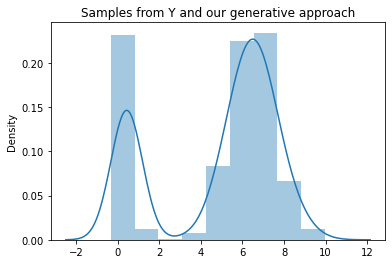

/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == '':


<Figure size 432x288 with 0 Axes>

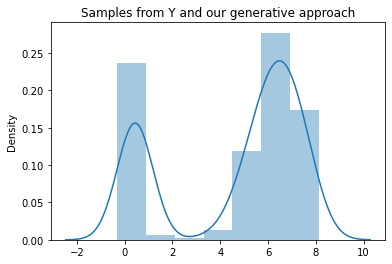

In [256]:
#samples_y = Y
X_gen = prior.sample((1000))
samples_y_gen = tf.reshape(decoder3(X_gen),(1000,))
#sns.distplot(samples_y)
plt.figure()
sns.distplot(samples_y_gen)
plt.title("Samples from Y and our generative approach")
plt.show()
plt.figure()
samples_y_gen_sort = tf.sort(samples_y_gen)
plt.figure()
sns.distplot(samples_y_gen_sort[:950])
plt.title("Samples from Y and our generative approach")
plt.show()


# Multivariate generation

## Experiment 1
Let **Y** the multivariate random vector we want to sample from. **Y** = ||**Y**|| **S**  
The norm is set to the 1D Y of 1D experiments. Namely, we generate ||**Y**|| from a multiplicative ||**Y**|| = AX. 
A is a gamma distribution with alpha = 3, beta = 0.5  
X is a inverse gamma distribution with alpha = 2.5, beta = 0.6  
We sample on the multivariate sphere according to a Dirichlet distribution. 
**S** is Dirichlet with K=5, $\alpha_1=\alpha_2 = 2$, $ \alpha_3=\alpha_4 = \alpha_5=1$.   
The latent space of the VAE on the sphere is a multivariate normal distribution with independent components.

In [5]:
K=5
alphas = [2.0, 2., 1., 1., 1.]
S =tfd.Dirichlet(alphas)

In [6]:
angles = S.sample(1000)
angle_train = angles[:250,:]
angle_eval = angles[250:]

In [235]:
encoded_size = 3
prior_sphere = tfd.Independent(tfd.Normal(loc=tf.zeros(encoded_size), scale=1),
                        reinterpreted_batch_ndims=1)

In [54]:
encoder_sphere = tfk.Sequential([
    tfkl.InputLayer(input_shape=[5]),
    tfkl.Dense(8,
               activation='relu'),
    tfkl.Dense(8,
               activation='relu'),
    tfkl.Dense(tfpl.IndependentNormal.params_size(encoded_size)),
    tfpl.IndependentNormal(
        encoded_size,
        activity_regularizer=tfpl.KLDivergenceRegularizer(prior_sphere, weight=1.0)),
])

In [237]:
encoder_sphere.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 8)                 48        
                                                                 
 dense_94 (Dense)            (None, 8)                 72        
                                                                 
 dense_95 (Dense)            (None, 6)                 54        
                                                                 
 independent_normal_1 (Indep  ((None, 3),              0         
 endentNormal)                (None, 3))                         
                                                                 
Total params: 174
Trainable params: 174
Non-trainable params: 0
_________________________________________________________________


In [55]:
decoder_sphere  = tfk.Sequential([
    tfkl.InputLayer(input_shape=[encoded_size]),
    tfkl.Dense(5, use_bias=True, activation='relu'),
    tfkl.Dense(10, use_bias=True, activation='relu'),
    tfkl.Dense(tfpl.IndependentNormal(
        K).params_size(K)),
    tfpl.IndependentNormal(
        K)
])

In [239]:
decoder_sphere.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 5)                 20        
                                                                 
 dense_97 (Dense)            (None, 10)                60        
                                                                 
 dense_98 (Dense)            (None, 10)                110       
                                                                 
 independent_normal_3 (Indep  ((None, 5),              0         
 endentNormal)                (None, 5))                         
                                                                 
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [56]:
vae_sphere = tfk.Model(inputs=encoder_sphere.inputs,
                outputs=decoder_sphere(encoder_sphere.outputs[0]))

In [18]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae_sphere.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [122]:
vae_sphere.fit(angle_train,angle_train,batch_size=32,epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 6ms/step - loss: 4.2084
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 3.6162
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 3.0562
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 2.5539
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 2.1239
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 1.6100
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 1.1635
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8149
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4263
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0657
Epoch 11/100
24/24 [==============================] - 0s 5ms/step - loss: -0.2023
Epoch 12/100
24/24 [==============================] - 0s 5ms/step - loss: -0.4624
Epoch 13/100
24/24 [===============

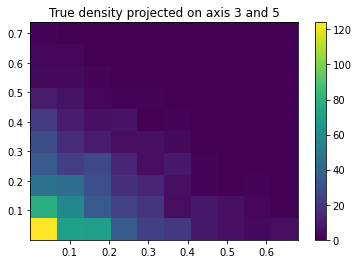

In [42]:
#Projection of the distribution on two axis
ax1 = 2
ax2 = 4
Y_1 = angles[:,ax1]
Y_2 = angles[:,ax2]
plt.figure()
plt.title(f'True density projected on axis {ax1 + 1} and {ax2 + 1}')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])

(1000, 5)


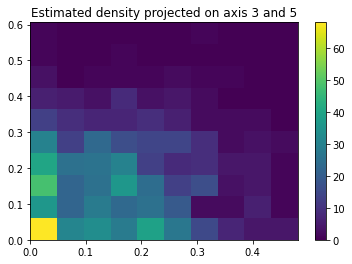

In [43]:
S_gen_prior = prior_sphere.sample((1000))
samples_S_gen = decoder_sphere(S_gen_prior)
print(samples_S_gen.shape)
S_gen1 = samples_S_gen[:,ax1]
S_gen1 = tf.maximum(S_gen1,0)
S_gen2 = samples_S_gen[:,ax2]
S_gen2 = tf.maximum(S_gen2,0)
plt.figure()
plt.title(f'Estimated density projected on axis {ax1 + 1} and {ax2 + 1}')
h =plt.hist2d(S_gen1, S_gen2,cmin=0)
plt.colorbar(h[3])

## Experiment 2
Same data generation process as Experiment 1.  
VAE for the radius is designed as in experiment for 1D generation.  
We modify VAE on the sphere to make it dependent to the radius.



In [14]:
#train_dataset
#angle_train
encoded_size = 4
prior_sphere_dependent = tfd.Independent(tfd.Normal(loc=tf.zeros(encoded_size), scale=1),
                        reinterpreted_batch_ndims=1)


In [271]:
S_input = tfk.Input(
    shape=[K], name="S_input"
)  
R_input = tfk.Input([1], name="R_input")
R_layer = tfkl.Dense(1, kernel_initializer = 'zeros', bias_initializer = 'zeros')(R_input)
inputs = tfkl.Concatenate()([S_input,R_layer])
layers = tfkl.Dense(8,
               activation='relu')(inputs)
layers = tfkl.Dense(8,
               activation='relu')(layers)
layers = tfkl.Dense(tfpl.IndependentNormal.params_size(encoded_size))(layers)
sig = layers[3:]
sig = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(sig)
params = tfkl.Concatenate()([layers[:3],sig])
posterior =     tfpl.IndependentNormal(
        encoded_size,
        activity_regularizer=tfpl.KLDivergenceRegularizer(prior_sphere_dependent, weight=1.0))(layers)

encoder_sphere_dependent = tfk.Model(
    inputs=[S_input,R_input],
    outputs=[posterior, R_input],
)

#posterior = tfkl.Reshape(target_shape=[1])(posterior) 
#print(posterior.shape)



In [272]:
encoder_sphere_dependent.summary()

Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 R_input (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 S_input (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_99 (Dense)               (None, 1)            2           ['R_input[0][0]']                
                                                                                                  
 concatenate_25 (Concatenate)   (None, 6)            0           ['S_input[0][0]',                
                                                                  'dense_99[0][0]']        

In [273]:
H_input = tfk.Input(
    shape=[encoded_size], name="H_input"
)  
R_inputD = tfk.Input([1], name="R_inputD")
R_layerD = tfkl.Dense(1, kernel_initializer = 'zeros', bias_initializer = 'zeros')(R_input)
inputsD = tfkl.Concatenate()([H_input,R_inputD])
layers = tfkl.Dense(5,
               activation='relu')(inputsD)
layers = tfkl.Dense(10,
               activation='relu')(layers)
layers = tfkl.Dense(tfpl.IndependentNormal.params_size(K))(layers)
#layers = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(layers)
likelihood =     tfpl.IndependentNormal(
        K)(layers)

decoder_sphere_dependent = tfk.Model(
    inputs=[H_input,R_inputD],
    outputs=[likelihood],
)

#posterior = tfkl.Reshape(target_shape=[1])(posterior) 
#print(posterior.shape)


In [274]:
decoder_sphere_dependent.summary()

Model: "model_44"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 H_input (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 R_inputD (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 concatenate_27 (Concatenate)   (None, 5)            0           ['H_input[0][0]',                
                                                                  'R_inputD[0][0]']               
                                                                                                  
 dense_104 (Dense)              (None, 5)            30          ['concatenate_27[0][0]']  

In [31]:
print(angle_train[:5,:].shape)
print(train_dataset[:5,:].shape)
print(encoder_sphere_dependent([angle_train[:5,:],train_dataset[:5,:]])[0])
print(encoder_sphere_dependent([angle_train[:5,:],train_dataset[:5,:]])[1])

(5, 5)
(5, 1)
tfp.distributions._TensorCoercible("model_independent_normal_tensor_coercible", batch_shape=[5], event_shape=[4], dtype=float32)
tf.Tensor(
[[ 6.969746  ]
 [ 1.6686413 ]
 [ 0.20783225]
 [15.7697525 ]
 [ 1.4969319 ]], shape=(5, 1), dtype=float32)


In [275]:
encoder_sphere_dependent.outputs
vae_sphere_dependent = tfk.Model(inputs=encoder_sphere_dependent.inputs,
                outputs=decoder_sphere_dependent(encoder_sphere_dependent.outputs))

In [17]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae_sphere_dependent.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-2),
            loss=negative_log_likelihood)

NameError: name 'vae_sphere_dependent' is not defined

In [34]:
vae_sphere_dependent.fit([angle_train,train_dataset],angle_train,batch_size=32,epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 6ms/step - loss: 20.3932
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 2.4561
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7478
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: -0.9441
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: -1.7833
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: -2.0482
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: -2.3631
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: -2.4305
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: -2.4900
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: -2.5676
Epoch 11/100
24/24 [==============================] - 0s 5ms/step - loss: -2.6246
Epoch 12/100
24/24 [==============================] - 0s 5ms/step - loss: -2.6504
Epoch 13/100
24/24 [=======

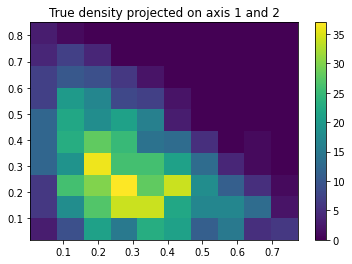

In [169]:
#Projection of the distribution on two axis 
ax1 = 0
ax2 = 1
Y_1 = angles[:,ax1]
Y_2 = angles[:,ax2]
plt.figure()
plt.title(f'True density projected on axis {ax1 + 1} and {ax2 + 1}')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])

tf.Tensor(0.48036945, shape=(), dtype=float32)
tf.Tensor(1.4652529, shape=(), dtype=float32)
tf.Tensor(4.8521075, shape=(), dtype=float32)
(1000, 5)


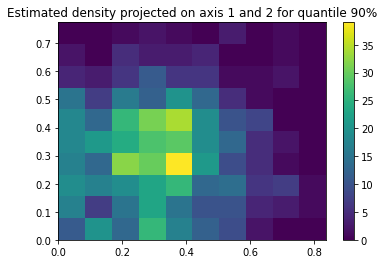

In [171]:
#Learned distribution for different quantiles
quantile = 90
sorted_Y = tf.sort(Y)
q10 = sorted_Y[100]
print(q10)
q50 = sorted_Y[500]
print(q50)
q90 = sorted_Y[900]
print(q90)
def q_to_tensor(q):
    return(tf.ones(1000)*q)

S_gen_prior = prior_sphere_dependent.sample((1000))
samples_S_gen = decoder_sphere_dependent([S_gen_prior,q_to_tensor(q90)])
print(samples_S_gen.shape)
S_gen1 = samples_S_gen[:,ax1]
S_gen1 = tf.maximum(S_gen1,0)
S_gen2 = samples_S_gen[:,ax2]
S_gen2 = tf.maximum(S_gen2,0)
plt.figure()
plt.title(f'Estimated density projected on axis {ax1 + 1} and {ax2 + 1} for quantile {quantile}%')
h =plt.hist2d(S_gen1, S_gen2,cmin=0)
plt.colorbar(h[3])

## Experiment 3  
In this experiment, the radius and the angle are no longer independent.
Let **Y** the multivariate random vector we want to sample from. **Y** = ||**Y**|| **S**  
The norm is set to the 1D Y of 1D experiments. Namely, we generate ||**Y**|| from a multiplicative frameqork ||**Y**|| = AX. 
A is a gamma distribution with alpha = 3, beta = 0.5  
X is a inverse gamma distribution with alpha = 2.5, beta = 0.6  
We sample on the multivariate sphere according to a Dirichlet distribution. 
For every radius ||**Y**||,  **S**| ||**Y**|| is Dirichlet with K=5, $\alpha_1(||\mathbf{Y}||)=\alpha_2(||\mathbf{Y}||) = 2 -min(1, \frac{1}{||\mathbf{Y}||})$, $ \alpha_3=\alpha_4 = \alpha_5=1 + min(1, \frac{1}{||\mathbf{Y}||})$.   
The latent space of the VAE on the sphere is a multivariate normal distribution with independent components.


In [10]:
def alphas_function(x):
    res = tf.convert_to_tensor([2. -tf.minimum(1.,1/x), 2. -tf.minimum(1.,1/x) , 1.+ tf.minimum(1,1/x), 1.+ tf.minimum(1,1/x), 1.+ tf.minimum(1,1/x)])
    return(tf.transpose(res))


alphas = alphas_function(train_dataset[:,0])

In [11]:
print(alphas.shape)

(250, 5)


In [12]:
angle_train_dep = tfd.Dirichlet(alphas).sample()

In [64]:
vae_sphere_dependent.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [65]:
vae_sphere_dependent.fit([angle_train_dep,train_dataset],angle_train_dep,batch_size=32,epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: -2.9583
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0261
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0485
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: -3.0308
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: -3.0554
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0508
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0528
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: -3.0611
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0554
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0780
Epoch 11/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0489
Epoch 12/100
24/24 [==============================] - 0s 5ms/step - loss: -3.0762
Epoch 13/100
24/24 [=====

In [69]:
quantile = 10
sorted_Y = tf.sort(Y)
q_Y=sorted_Y[quantile*10]
print(q_Y)

tf.Tensor(0.48388457, shape=(), dtype=float32)


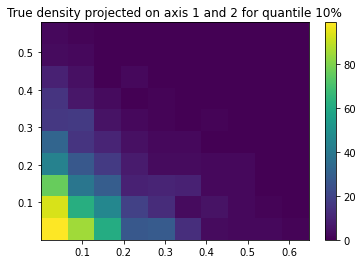

In [70]:
#Projection of the distribution on two axis 
alphas_dep = alphas_function(q_Y)
angles_q = tfd.Dirichlet(alphas_dep).sample(1000)
ax1 = 0
ax2 = 1
Y_1 = angles_q[:,ax1]
Y_2 = angles_q[:,ax2]
plt.figure()
plt.title(f'True density projected on axis {ax1 + 1} and {ax2 + 1} for quantile {quantile}%')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])

(1000, 5)


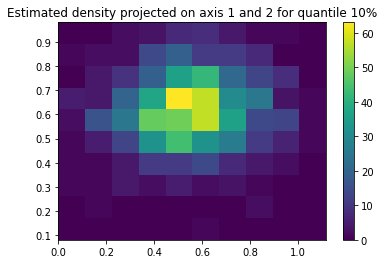

In [99]:
def q_to_tensor(q):
    return(tf.ones(1000)*q)

S_gen_prior = prior_sphere_dependent.sample((1000))
samples_S_gen = decoder_sphere_dependent([S_gen_prior,q_to_tensor(100)])
print(samples_S_gen.shape)
S_gen1 = samples_S_gen[:,ax1]
S_gen1 = tf.maximum(S_gen1,0)
S_gen2 = samples_S_gen[:,ax2]
S_gen2 = tf.maximum(S_gen2,0)
plt.figure()
plt.title(f'Estimated density projected on axis {ax1 + 1} and {ax2 + 1} for quantile {quantile}%')
h =plt.hist2d(S_gen1, S_gen2,cmin=0)
plt.colorbar(h[3])

## Experiment on Danube discharge measurements

In [45]:
from netCDF4 import Dataset

In [46]:
ncfile = Dataset('/home/nlafon/These/4Dvarnetstochastic/Danube_river_network/Dataset_danube.nc',"r")
L=[]
for i in range(31):
    L.append(ncfile['S'+str(i+1)][:].reshape(18244,1))
        
dataset = np.concatenate((L[0],L[1],L[2],L[3],L[4],L[5],L[6],L[7],L[8],L[9],L[10],L[11],L[12],L[13],L[14],L[15],L[16],L[17],L[18],L[19],L[20],L[21],L[22],L[23],L[24],L[25],L[26],L[27],L[28],L[29],L[30]),axis=1)
print(dataset.shape)


(18244, 31)


We focus on two groups of stations R4 and R2 (see $Asadi\ et\ al.\ (2015). $)  
R2 comprises five stations in the Inn basin that are fed by precipitation in high-altitude alpine regions.  
R4 contains five stations with sources north of the Danube.  
Stations of R4 : 23; 24; 25; 26; 27.   
Stations of R2 : 13; 28; 29; 30; 31.

In [47]:
R4 = dataset[:,22:27]
axis = 1
filter_indices = [12,27,28,29,30]
R2 =  np.take(dataset, filter_indices, axis)


In [7]:
print(np.min(R4))
print(np.max(R4))

1.41
589.0


In [63]:
R4_rad = np.sum(R4,axis)
R4_rad = R4_rad.reshape((18244,1))
R4_S = np.divide(R4,R4_rad)
rad_train = R4_rad[::10,:]
sphere_train = R4_S[::10,:]


### Sample from the radius

Faire 2 constantes alpha différentes pour l'encodeur et le décodeur

In [209]:
prior =tfd.InverseGamma(concentration = 4.5, scale = 1 )
zeros_traindataset=tf.zeros(rad_train.shape)


In [210]:
Y_input = tfk.Input(
    shape=[1], name="Y_train"
)  
zeros_input = tfk.Input([1], name="Zeros_train")
beta_layer = tfkl.Dense(3,activation=None)(Y_input)
beta_layer = tfkl.Dense(3,activation=None)(beta_layer)
beta_layer = tfkl.Dense(1,activation=None)(beta_layer)
alpha_layer = tfkl.Dense(1,use_bias=True,activation=None, bias_initializer=tfk.initializers.Ones()
)(zeros_input)
alpha_layer = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(alpha_layer)
beta_layer = tfkl.Lambda(lambda x: tf.abs(x)+0.001,name = 'inv_gamma_beta_posterior')(beta_layer)
alpha_beta = tfkl.Concatenate()([alpha_layer,beta_layer])
posterior = tfpl.DistributionLambda(
    make_distribution_fn=lambda t: tfd.InverseGamma(
        concentration=t[... , 0], scale=t[...,1]),
    activity_regularizer=tfpl.KLDivergenceRegularizer(prior),
)(alpha_beta)
posterior = tfkl.Reshape(target_shape=[1])(posterior) 
print(posterior.shape)
encoder_Danube = tfk.Model(
    inputs=[Y_input,zeros_input],
    outputs=[posterior, alpha_layer],
)


(None, 1)


In [211]:
post_input = tfk.Input(
    shape=[1], name="post_input"
)  
alpha_input = tfk.Input([1], name="alpha_input")

beta_deco = tfkl.Dense(5, use_bias=True, activation='relu')(post_input)
beta_deco = tfkl.Dense(5, use_bias=True, activation='relu')(beta_deco)
beta_deco = tfkl.Dense(1, use_bias=True)(beta_deco)
beta_deco = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(beta_deco/(post_input**2))
alpha_beta = tfkl.Concatenate()([alpha_input,beta_deco])
out = tfpl.DistributionLambda(
make_distribution_fn=lambda v: tfd.Gamma(
        concentration=v[...,0], rate=v[...,1]),       
)(alpha_beta)
decoder_Danube = tfk.Model(
    inputs=[post_input,alpha_input],
    outputs=out
)
 #   convert_to_tensor_fn=lambda s: s.sample),


In [212]:
vae_Danube = tfk.Model(inputs=encoder_Danube.inputs,
                outputs=decoder_Danube(encoder_Danube.outputs))

In [219]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae_Danube.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-5),
            loss=negative_log_likelihood)

In [220]:
vae_Danube.fit(
    {"Y_train" : rad_train, "Zeros_train" : zeros_traindataset},
    rad_train,
         batch_size=16,epochs=100)


Epoch 1/100
115/115 [==============================] - 2s 5ms/step - loss: 6.6555
Epoch 2/100
115/115 [==============================] - 1s 6ms/step - loss: 6.6616
Epoch 3/100
115/115 [==============================] - 1s 5ms/step - loss: 6.6756
Epoch 4/100
115/115 [==============================] - 1s 5ms/step - loss: 6.5975
Epoch 5/100
115/115 [==============================] - 1s 6ms/step - loss: 6.6028
Epoch 6/100
115/115 [==============================] - 1s 5ms/step - loss: 6.7676
Epoch 7/100
115/115 [==============================] - 1s 5ms/step - loss: 6.6300
Epoch 8/100
115/115 [==============================] - 1s 6ms/step - loss: 6.6261
Epoch 9/100
115/115 [==============================] - 1s 8ms/step - loss: 6.7204
Epoch 10/100
115/115 [==============================] - 1s 8ms/step - loss: 6.6977
Epoch 11/100
115/115 [==============================] - 1s 8ms/step - loss: 6.6978
Epoch 12/100
115/115 [==============================] - 1s 8ms/step - loss: 6.6861
Epoch 13/100


KeyboardInterrupt: 

In [221]:
c=tf.constant([[1.0]])
z = tf.constant([[0.0]])
alpha_q_l = encoder_Danube([c,z])[1]
print(alpha_q_l)

tf.Tensor([[2.147743]], shape=(1, 1), dtype=float32)


4.613641


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we 

<AxesSubplot:ylabel='Density'>

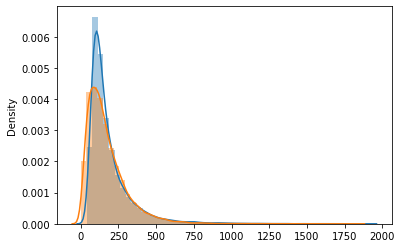

In [222]:
#Comparaison entre la densité de Y et de notre modèle génératif

samples_rad = R4_rad.reshape(18244,)
X_gen = prior.sample((18244,1))
a_q_l = tf.zeros((18244,1))+alpha_q_l
print(np.max(X_gen))
samples_rad_gen = tf.reshape(decoder_Danube([X_gen,a_q_l]),(18244,))

sns.distplot(samples_rad)
sns.distplot(samples_rad_gen)
#plt.title("Samples from Y and our generative approach")
#plt.show()



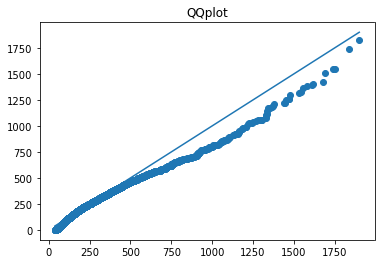

In [223]:
plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_rad),tf.sort(samples_rad_gen))
plt.plot(tf.sort(samples_rad),tf.sort(samples_rad))

/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

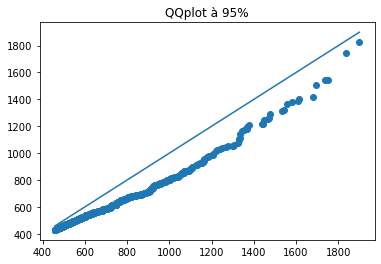

In [227]:
# QQ plot à x%
x = 95
plt.figure()
plt.title(f'QQplot à {x}%')
plt.scatter(tf.sort(samples_rad)[np.int(x*18244/100):],tf.sort(samples_rad_gen)[np.int(x*18244/100):])
plt.plot(tf.sort(samples_rad)[np.int(x*18244/100):],tf.sort(samples_rad)[np.int(x*18244/100):])

<Figure size 432x288 with 0 Axes>

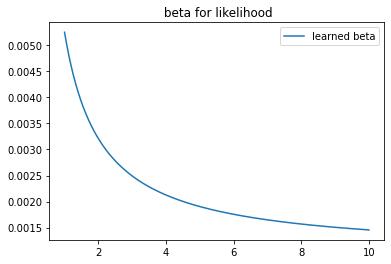

<Figure size 432x288 with 0 Axes>

In [228]:
#tracer fonction beta du décodeur
decoder_Danube
x =tf.linspace(
    1,10, 1000, name=None, axis=0
)
x = tf.expand_dims(x,-1)
beta_x = decoder_Danube([x,a_q_l[:1000]]).rate
plt.figure()
plt.title(" beta for likelihood")
plt.plot(x,beta_x,label='learned beta')
plt.legend(['learned beta'])
plt.figure()

## Sample on the sphere

### Sphere and radius independent

In [242]:
vae_sphere.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [244]:
vae_sphere.fit(sphere_train,sphere_train,batch_size=32,epochs=100)

Epoch 1/100
58/58 [==============================] - 2s 5ms/step - loss: 3.1835
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 2.0140
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: -0.4243
Epoch 4/100
58/58 [==============================] - 0s 5ms/step - loss: -2.6186
Epoch 5/100
58/58 [==============================] - 0s 5ms/step - loss: -3.7149
Epoch 6/100
58/58 [==============================] - 0s 6ms/step - loss: -3.9564
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: -5.2006
Epoch 8/100
58/58 [==============================] - 0s 5ms/step - loss: -6.2682
Epoch 9/100
58/58 [==============================] - 0s 5ms/step - loss: -6.7820
Epoch 10/100
58/58 [==============================] - 0s 5ms/step - loss: -7.6471
Epoch 11/100
58/58 [==============================] - 0s 5ms/step - loss: -7.7267
Epoch 12/100
58/58 [==============================] - 0s 5ms/step - loss: -8.2059
Epoch 13/100
58/58 [=======

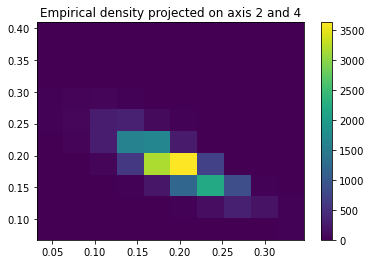

In [268]:
#Projection of the distribution on two axis 
ax1 = 1
ax2 = 3
Y_1 = R4_S[:,ax1]
Y_2 = R4_S[:,ax2]
plt.figure()
plt.title(f'Empirical density projected on axis {ax1 + 1} and {ax2 + 1}')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])

(18244, 5)


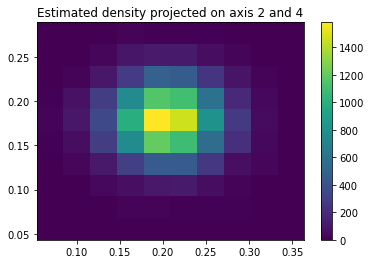

In [269]:
S_gen_prior = prior_sphere.sample((18244))
samples_S_gen = decoder_sphere(S_gen_prior)
print(samples_S_gen.shape)
S_gen1 = samples_S_gen[:,ax1]
#S_gen1 = tf.maximum(S_gen1,0)
S_gen2 = samples_S_gen[:,ax2]
#S_gen2 = tf.maximum(S_gen2,0)
plt.figure()
plt.title(f'Estimated density projected on axis {ax1 + 1} and {ax2 + 1}')
h =plt.hist2d(S_gen1, S_gen2,cmin=0)
plt.colorbar(h[3])

### Sphere and radius dependent

In [15]:
K=5
encoded_size = 4
S_input = tfk.Input(
    shape=[K], name="S_input"
)  
R_input = tfk.Input([1], name="R_input")
R_layer = tfkl.Dense(1, kernel_initializer = 'zeros', bias_initializer = 'zeros')(R_input)
inputs = tfkl.Concatenate()([S_input,R_layer])
layers = tfkl.Dense(8,
               activation='relu')(inputs)
layers = tfkl.Dense(8,
               activation='relu')(layers)
layers = tfkl.Dense(tfpl.IndependentNormal.params_size(encoded_size))(layers)
sig = layers[3:]
sig = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(sig)
params = tfkl.Concatenate()([layers[:3],sig])
posterior =     tfpl.IndependentNormal(
        encoded_size,
        activity_regularizer=tfpl.KLDivergenceRegularizer(prior_sphere_dependent, weight=1.0))(layers)

encoder_sphere_dependent = tfk.Model(
    inputs=[S_input,R_input],
    outputs=[posterior, R_input],
)

#posterior = tfkl.Reshape(target_shape=[1])(posterior) 
#print(posterior.shape)



In [16]:
H_input = tfk.Input(
    shape=[encoded_size], name="H_input"
)  
R_inputD = tfk.Input([1], name="R_inputD")
R_layerD = tfkl.Dense(1, kernel_initializer = 'zeros', bias_initializer = 'zeros')(R_input)
inputsD = tfkl.Concatenate()([H_input,R_inputD])
layers = tfkl.Dense(5,
               activation='relu')(inputsD)
layers = tfkl.Dense(10,
               activation='relu')(layers)
layers = tfkl.Dense(tfpl.IndependentNormal.params_size(K))(layers)
#layers = tfkl.Lambda(lambda x: tf.abs(x)+0.001)(layers)
likelihood =     tfpl.IndependentNormal(
        K)(layers)

decoder_sphere_dependent = tfk.Model(
    inputs=[H_input,R_inputD],
    outputs=[likelihood],
)


In [17]:
vae_sphere_dependent = tfk.Model(inputs=encoder_sphere_dependent.inputs,
                outputs=decoder_sphere_dependent(encoder_sphere_dependent.outputs))

In [19]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)
vae_sphere_dependent.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [20]:
vae_sphere_dependent.fit([sphere_train,rad_train/100],sphere_train,batch_size=32,epochs=100)

Epoch 1/100
58/58 [==============================] - 2s 6ms/step - loss: 5.1642
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: 3.6796
Epoch 3/100
58/58 [==============================] - 0s 6ms/step - loss: 2.6883
Epoch 4/100
58/58 [==============================] - 0s 6ms/step - loss: 1.4990
Epoch 5/100
58/58 [==============================] - 0s 5ms/step - loss: -0.2951
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: -1.6969
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: -2.3355
Epoch 8/100
58/58 [==============================] - 0s 6ms/step - loss: -2.7849
Epoch 9/100
58/58 [==============================] - 0s 5ms/step - loss: -2.6997
Epoch 10/100
58/58 [==============================] - 0s 5ms/step - loss: -4.0677
Epoch 11/100
58/58 [==============================] - 0s 5ms/step - loss: -4.7581
Epoch 12/100
58/58 [==============================] - 0s 5ms/step - loss: -4.7176
Epoch 13/100
58/58 [=========

(18244,)
tf.Tensor(352.4, shape=(), dtype=float64)
tf.Tensor(458.20000000000005, shape=(), dtype=float64)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

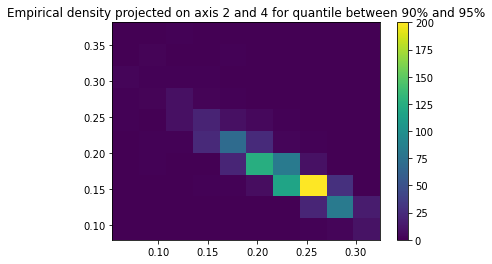

In [51]:
q1 = 90
q2 = 95
sorted_rad = tf.sort(R4_rad[:,0])
print(sorted_rad.shape)
rad_q1 = sorted_rad[np.int(q1/100*18244)]
rad_q2 = sorted_rad[np.int(q2/100*18244)]
print(rad_q1)
print(rad_q2)

Bsup = (np.where(R4_rad>rad_q1)[0])
Binf = (np.where(R4_rad<rad_q2)[0])

def intersection(nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """  
        set1 = set(nums1)
        set2 = set(nums2)
        return list(set2 & set1)
    
I= intersection(Bsup,Binf)

q_rad = R4_rad[I]
q_sphere = R4_S[I]

#Projection of the distribution on two axis 
ax1 = 1
ax2 = 3
Y_1 = q_sphere[:,ax1]
Y_2 = q_sphere[:,ax2]
plt.figure()
plt.title(f'Empirical density projected on axis {ax1 + 1} and {ax2 + 1} for quantile between {q1}% and {q2}%')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])


(911, 5)


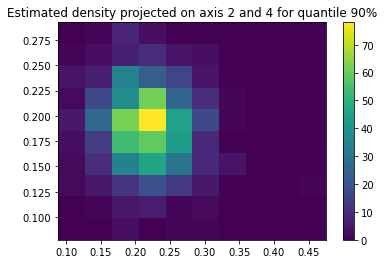

In [52]:
#Learned distribution for different quantiles
q_rad = tf.reshape(q_rad,q_rad.shape[0])
qx = (tf.get_static_value(rad_q1) +tf.get_static_value(rad_q2))/2

def q_to_tensor(q):
    return(tf.ones(q_rad.shape)*q)

S_gen_prior = prior_sphere_dependent.sample(q_rad.shape)
samples_S_gen = decoder_sphere_dependent([S_gen_prior,q_to_tensor(qx)/100])
print(samples_S_gen.shape)
S_gen1 = samples_S_gen[:,ax1]
S_gen1 = tf.maximum(S_gen1,0)
S_gen2 = samples_S_gen[:,ax2]
S_gen2 = tf.maximum(S_gen2,0)
plt.figure()
plt.title(f'Estimated density projected on axis {ax1 + 1} and {ax2 + 1} for quantile {q1}%')
h =plt.hist2d(S_gen1, S_gen2,cmin=0)
plt.colorbar(h[3])

# Competitors

## Standard VAE

### 1D comparison

In [286]:
encoded_size = 1
K=1
prior_VAE = tfd.Normal(loc=tf.zeros(encoded_size), scale=1)

In [287]:
encoder_VAE = tfk.Sequential([
    tfkl.InputLayer(input_shape=[1]),
    tfkl.Dense(2,
               activation='relu'),
    tfkl.Dense(2,
               activation='relu'),
    tfkl.Dense(tfpl.IndependentNormal.params_size(encoded_size)),
    tfpl.IndependentNormal(
        encoded_size,
        activity_regularizer=tfpl.KLDivergenceRegularizer(prior_VAE, weight=1.0)),
])

In [288]:
encoder_VAE.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 2)                 4         
                                                                 
 dense_103 (Dense)           (None, 2)                 6         
                                                                 
 dense_104 (Dense)           (None, 2)                 6         
                                                                 
 independent_normal_7 (Indep  ((None, 1),              0         
 endentNormal)                (None, 1))                         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [289]:
decoder_VAE  = tfk.Sequential([
    tfkl.InputLayer(input_shape=[encoded_size]),
    tfkl.Dense(2, use_bias=True, activation='relu'),
    tfkl.Dense(2, use_bias=True, activation='relu'),
    tfkl.Dense(tfpl.IndependentNormal(
        K).params_size(K)),
    tfpl.IndependentNormal(
        K)
])

In [290]:
decoder_VAE.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 2)                 4         
                                                                 
 dense_106 (Dense)           (None, 2)                 6         
                                                                 
 dense_107 (Dense)           (None, 2)                 6         
                                                                 
 independent_normal_9 (Indep  ((None, 1),              0         
 endentNormal)                (None, 1))                         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [291]:
vae_standard = tfk.Model(inputs=encoder_VAE.inputs,
                outputs=decoder_VAE(encoder_VAE.outputs))
print(vae_standard.output_shape)

(None, 1)


In [292]:
negative_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

vae_standard.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [293]:
train_dataset=tf.math.log(train_dataset)

vae_standard.fit(train_dataset,train_dataset,batch_size=32,epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 5ms/step - loss: 10.8068
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 8.6362
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 7.2387
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 6.9665
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 10.3443
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 9.0198
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 6.0702
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 7.7125
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 7.8136
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 5.8734
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 5.4656
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 7.3442
Epoch 13/100
8/8 [==============================] - 0s 4ms/

(1000,)
(1000,)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == '__main__':


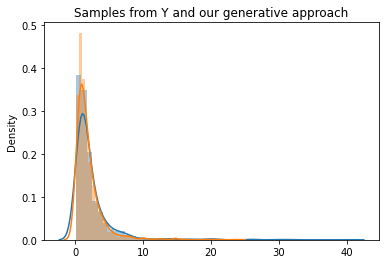

In [294]:
#Comparaison entre la densité de Y et de notre modèle génératif
samples_y = Y
print(samples_y.shape)
X_gen = prior.sample((1000,1))
#samples_y_gen = tf.reshape(decoder_VAE(X_gen),(1000,))
samples_y_gen = tf.math.exp(tf.reshape(decoder_VAE(X_gen),(1000,)))
print(samples_y_gen.shape)
sns.distplot(samples_y)
sns.distplot(samples_y_gen)
plt.title("Samples from Y and our generative approach")
plt.show()


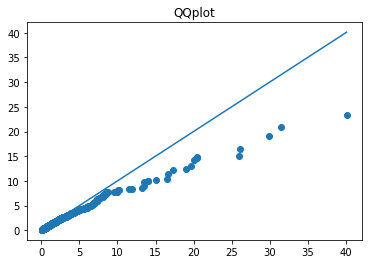

In [296]:
plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_y),tf.sort(samples_y_gen))
plt.plot(tf.sort(samples_y),tf.sort(samples_y))

### Multivariate comparison

#### Radius and sphere independent

In [313]:
encoded_size = 4
prior_sphere = tfd.Independent(tfd.Normal(loc=tf.zeros(encoded_size), scale=1),
                        reinterpreted_batch_ndims=1)
print(angle_train.shape)
print(train_dataset.shape)
train_mv = angle_train*train_dataset
print(train_mv.shape)

(250, 5)
(250, 1)
(250, 5)


In [314]:
vae_sphere.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [320]:
vae_sphere.fit(train_mv,train_mv,batch_size=32,epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2563
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 3.3241
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 3.4070
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3505
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 3.4390
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2467
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2199
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 3.8215
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 3.2342
Epoch 10/100
8/8 [==============================] - 0s 12ms/step - loss: 3.2013
Epoch 11/100
8/8 [==============================] - 0s 7ms/step - loss: 3.4134
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3243
Epoch 13/100
8/8 [==============================] - 0s 10ms/

(1000,)
(1000, 4)
(1000, 5)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == '':
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  del sys.path[0]


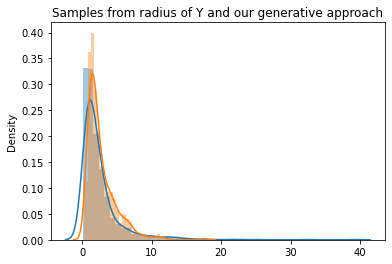

In [333]:
#Comparaison entre la densité de Y et de notre modèle génératif
samples_y = Y
print(samples_y.shape)
X_gen = prior_sphere.sample(1000)
print(X_gen.shape)
samples_y_gen =decoder_sphere(X_gen)

#samples_y_gen = tf.reshape(decoder_VAE(X_gen),(1000,K))
samples_rad = tf.math.reduce_sum(tf.abs(samples_y_gen),axis=1)
samples_sphere = samples_y_gen/tf.reshape(samples_rad,(1000,1))
print(samples_y_gen.shape)
sns.distplot(samples_y)
sns.distplot(samples_rad)
plt.title("Samples from radius of Y and our generative approach")
plt.show()

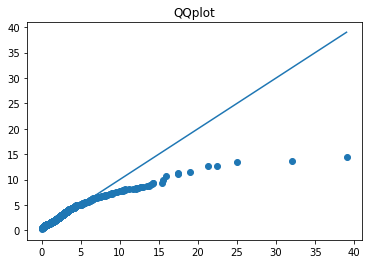

In [331]:
plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_y),tf.sort(samples_rad))
plt.plot(tf.sort(samples_y),tf.sort(samples_y))

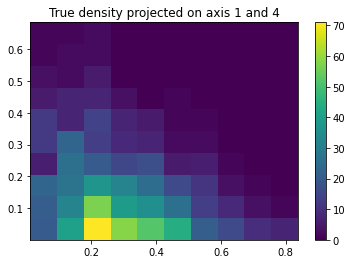

In [338]:
#Projection of the distribution on two axis 
ax1 = 0
ax2 = 3
Y_1 = angles[:,ax1]
Y_2 = angles[:,ax2]
plt.figure()
plt.title(f'True density projected on axis {ax1 + 1} and {ax2 + 1}')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])

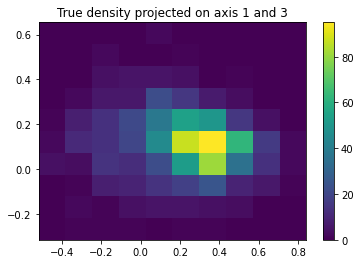

In [337]:
Y_1 = samples_sphere[:,ax1]
Y_2 = samples_sphere[:,ax2]
plt.figure()
plt.title(f'True density projected on axis {ax1 + 1} and {ax2 + 1}')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])

#### Radius and sphere dependent

In [53]:
encoded_size = 5
prior_sphere = tfd.Independent(tfd.Normal(loc=tf.zeros(encoded_size), scale=1),
                        reinterpreted_batch_ndims=1)
print(angle_train_dep.shape)
print(train_dataset.shape)
train_mv_dependent = angle_train_dep*train_dataset
print(train_mv_dependent.shape)

(250, 5)
(250, 1)
(250, 5)


In [21]:
vae_sphere.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)

In [22]:
vae_sphere.fit(train_mv_dependent,train_mv_dependent,batch_size=32,epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 7ms/step - loss: 2.4416
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 2.3152
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 2.3385
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 2.2831
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 2.4524
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 2.3400
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 2.2908
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2645
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 2.2631
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 2.2405
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss: 2.2825
Epoch 12/100
8/8 [==============================] - 0s 5ms/step - loss: 2.3662
Epoch 13/100
8/8 [==============================] - 0s 5ms/st

(1000,)
(1000, 5)
(1000, 5)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == '':
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  del sys.path[0]


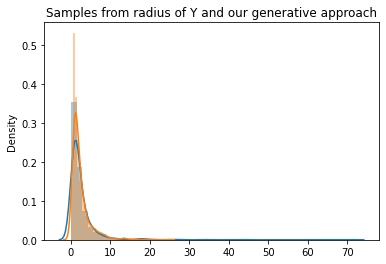

In [23]:
#Comparaison entre la densité de Y et de notre modèle génératif
samples_y = Y
print(samples_y.shape)
X_gen = prior_sphere.sample(1000)
print(X_gen.shape)
samples_y_gen =decoder_sphere(X_gen)

#samples_y_gen = tf.reshape(decoder_VAE(X_gen),(1000,K))
samples_rad = tf.math.reduce_sum(tf.abs(samples_y_gen),axis=1)
samples_sphere = samples_y_gen/tf.reshape(samples_rad,(1000,1))
print(samples_y_gen.shape)
sns.distplot(samples_y)
sns.distplot(samples_rad)
plt.title("Samples from radius of Y and our generative approach")
plt.show()

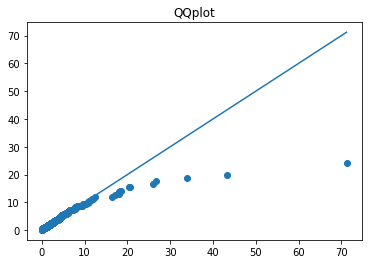

In [24]:
plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_y),tf.sort(samples_rad))
plt.plot(tf.sort(samples_y),tf.sort(samples_y))

In [40]:
quantile = 95
sorted_Y = tf.sort(Y)
q_Y=sorted_Y[quantile*10]
print(q_Y)

tf.Tensor(7.5009766, shape=(), dtype=float32)


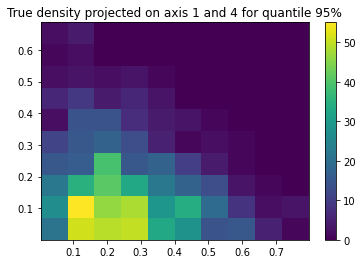

In [41]:
#Projection of the distribution on two axis 
alphas_dep = alphas_function(q_Y)
angles_q = tfd.Dirichlet(alphas_dep).sample(1000)
ax1 = 0
ax2 = 3
Y_1 = angles_q[:,ax1]
Y_2 = angles_q[:,ax2]
plt.figure()
plt.title(f'True density projected on axis {ax1 + 1} and {ax2 + 1} for quantile {quantile}%')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])

75
(1000, 5)


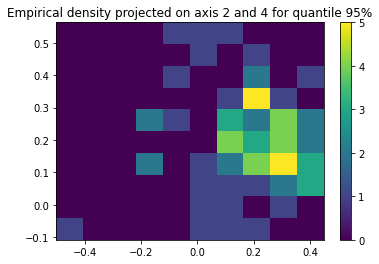

In [43]:
epsilon = 2

Bsup = (np.where(samples_rad>q_Y-epsilon)[0])
Binf = (np.where(samples_rad<q_Y+epsilon)[0])

def intersection(nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """  
        set1 = set(nums1)
        set2 = set(nums2)
        return list(set2 & set1)
    
I= intersection(Bsup,Binf)
print(len(I))

samples_rad = np.reshape(samples_rad,(1000,1))
q_rad = samples_rad[I]
print(samples_sphere.shape)
samples_sphere = np.reshape(samples_sphere,(1000,5))
q_sphere = samples_sphere[I]

#Projection of the distribution on two axis 
ax1 = 1
ax2 = 3
Y_1 = q_sphere[:,ax1]
Y_2 = q_sphere[:,ax2]
plt.figure()
plt.title(f'Empirical density projected on axis {ax1 + 1} and {ax2 + 1} for quantile {quantile}%')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])


### Danube river network discharges

In [57]:
R4_train = R4[::10,:]/100

In [58]:
vae_sphere.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-3),
            loss=negative_log_likelihood)


In [61]:
vae_sphere.fit(R4_train,R4_train,batch_size=32,epochs=100)

Epoch 1/100
58/58 [==============================] - 0s 5ms/step - loss: -3.0802
Epoch 2/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1017
Epoch 3/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1574
Epoch 4/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1359
Epoch 5/100
58/58 [==============================] - 0s 5ms/step - loss: -3.0919
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1455
Epoch 7/100
58/58 [==============================] - 0s 5ms/step - loss: -3.0959
Epoch 8/100
58/58 [==============================] - 0s 5ms/step - loss: -2.9407
Epoch 9/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1462
Epoch 10/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1340
Epoch 11/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1896
Epoch 12/100
58/58 [==============================] - 0s 5ms/step - loss: -3.1897
Epoch 13/100
58/58 [=====

(1000,)
(1000, 5)
(1000, 5)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == '':
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  del sys.path[0]


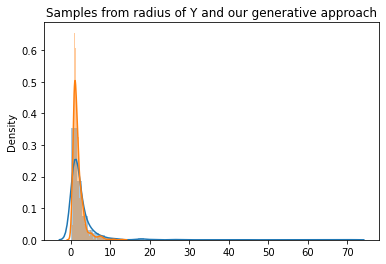

In [65]:
#Comparaison entre la densité de Y et de notre modèle génératif
samples_y = Y
print(samples_y.shape)
X_gen = prior_sphere.sample(1000)
print(X_gen.shape)
samples_y_gen =decoder_sphere(X_gen)

#samples_y_gen = tf.reshape(decoder_VAE(X_gen),(1000,K))
samples_rad = tf.math.reduce_sum(tf.abs(samples_y_gen),axis=1)
samples_sphere = samples_y_gen/tf.reshape(samples_rad,(1000,1))
print(samples_y_gen.shape)
sns.distplot(samples_y)
sns.distplot(samples_rad)
plt.title("Samples from radius of Y and our generative approach")
plt.show()

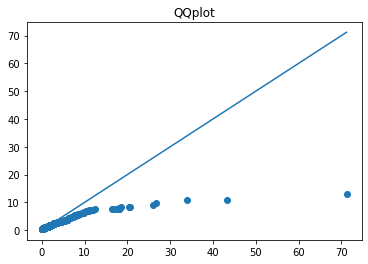

In [66]:
plt.figure()
plt.title('QQplot')
plt.scatter(tf.sort(samples_y),tf.sort(samples_rad))
plt.plot(tf.sort(samples_y),tf.sort(samples_y))

(18244,)
tf.Tensor(352.4, shape=(), dtype=float64)
tf.Tensor(458.20000000000005, shape=(), dtype=float64)


/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/home/nlafon/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

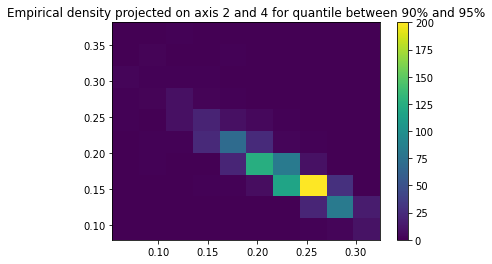

In [64]:
q1 = 90
q2 = 95
sorted_rad = tf.sort(R4_rad[:,0])
print(sorted_rad.shape)
rad_q1 = sorted_rad[np.int(q1/100*18244)]
rad_q2 = sorted_rad[np.int(q2/100*18244)]
print(rad_q1)
print(rad_q2)

Bsup = (np.where(R4_rad>rad_q1)[0])
Binf = (np.where(R4_rad<rad_q2)[0])

def intersection(nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """  
        set1 = set(nums1)
        set2 = set(nums2)
        return list(set2 & set1)
    
I= intersection(Bsup,Binf)

q_rad = R4_rad[I]
q_sphere = R4_S[I]

#Projection of the distribution on two axis 
ax1 = 1
ax2 = 3
Y_1 = q_sphere[:,ax1]
Y_2 = q_sphere[:,ax2]
plt.figure()
plt.title(f'Empirical density projected on axis {ax1 + 1} and {ax2 + 1} for quantile between {q1}% and {q2}%')
h =plt.hist2d(Y_1, Y_2)
plt.colorbar(h[3])


# Metrics comparison

## Wasserstein distance

In [3]:
import ot

### Example 

In [4]:
mu1 = 1
sig1 = 2
mu2 = 0
sig2=1
n1 = 50
n2 = 50 
d=5

mvn1 = tfd.MultivariateNormalDiag(
    loc=[mu1],
scale_diag=[sig1])
mvn2 = tfd.MultivariateNormalDiag(
    loc=[mu2],
scale_diag=[sig2])


s1 = mvn1.sample([n1,d])
s2 = mvn2.sample([n2,d])

s1 = tf.reshape(s1,(n1,d)).numpy()
s2=tf.reshape(s2,(n2,d)).numpy()
a, b = np.ones((n1,)) / n1, np.ones((n2,)) / n2 

Instructions for updating:
Do not call `graph_parents`.


2022-11-04 19:00:57.279341: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-04 19:00:57.280022: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.635GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-11-04 19:00:57.280075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-04 19:00:57.280121: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-04 19:00:57.280140: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-11-04 19:00:57.280158: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuff

TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.

In [6]:
M=ot.dist(s1,s2)

In [7]:
ot.emd2(a,b,M)

13.41386811733246

## Threshold selection

### Example

In [5]:
conc = 1.2
sc = 0.5
mvn1 = tfd.MultivariateNormalDiag(
    loc=[mu1],
scale_diag=[sig1])
R=tfd.InverseGamma(conc,sc).sample(1000)
#Z=tfd.Gamma(conc,sc).sample(1000)
def alphas_function(x):
    res = tf.convert_to_tensor([2. -tf.minimum(1.,1/x), 2. -tf.minimum(1.,1/x) , 1.+ tf.minimum(1,1/x), 1.+ tf.minimum(1,1/x), 1.+ tf.minimum(1,1/x)])
    return(tf.transpose(res))
alphas = alphas_function(R)
# = tfd.Dirichlet(alphas).sample()

In [9]:
print(R.shape)
print(angle_dep.shape)

(1000,)


NameError: name 'angle_dep' is not defined

In [10]:
R_sort = tf.sort(R)
q= 0.6
print(R_sort[np.int(q*10000)])

/tmp/ipykernel_122295/3261725717.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(R_sort[np.int(q*10000)])
2022-11-03 17:26:18.196692: W tensorflow/core/framework/op_kernel.cc:1763] OP_REQUIRES failed at strided_slice_op.cc:108 : Invalid argument: slice index 6000 of dimension 0 out of bounds.


InvalidArgumentError: slice index 6000 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [5]:
R = tf.abs(tfd.StudentT(df=2,loc=0,scale=1).sample(10000))
R_sort=tf.sort(R)
theta1 = tfd.Uniform().sample(1000)
theta2 = tfd.Beta(concentration1=3,
    concentration0=3,
).sample(9000)
print(theta2.shape)
angle_dep=tf.concat([theta2,theta1],axis=0)
angle_dep = tf.expand_dims(angle_dep,axis=-1)
print(angle_dep.shape)
print(R_sort.shape)


(9000,)
(10000, 1)
(10000,)


In [14]:
def T(X,Y,n):
    MX = ot.dist(X,X,'sqeuclidean')
    print(MX[:5,:5])
    MY = ot.dist(Y,Y,'sqeuclidean')
    T1 = (1/n**2)*tf.reduce_sum(tf.math.multiply(MX,MY))
    T2 = (2/n**3)*tf.reduce_sum(tf.linalg.matmul(MX,MY))
    T3 = (1/n**4)*tf.reduce_sum(tf.tensordot(MX,MY,axes=0))
    return T1-T2+T3
    
    

In [17]:
def distmat(X):
    r = tf.reduce_sum(X*X, 1)
    r = tf.reshape(r, [-1, 1])
    D = r - 2*tf.matmul(X, tf.transpose(X)) + tf.transpose(r)
    return(tf.maximum(D,0))

def T2(X,Y,n):
    MX = tf.math.sqrt(distmat(X))
    MY = tf.math.sqrt(distmat(Y))
    T1 = (1/n**2)*tf.reduce_sum(tf.math.multiply(MX,MY))
    T2 = (2/n**3)*tf.reduce_sum(tf.linalg.matmul(MX,MY))
    T3 = (1/n**4)*tf.reduce_sum(tf.tensordot(MX,MY,axes=0))
    return T1-T2+T3

In [18]:
print(T(s1,s2,50))
print(T2(s1,s2,50))


[[ 0.       49.393085 37.23257  28.767477 42.236885]
 [49.393085  0.       43.868286 40.325645 42.417206]
 [37.23257  43.868286  0.       42.02893  14.511665]
 [28.767479 40.325645 42.02893   0.       39.846367]
 [42.236885 42.41721  14.511665 39.846367  0.      ]]
tf.Tensor(9.232849, shape=(), dtype=float32)
tf.Tensor(0.37864494, shape=(), dtype=float32)


In [19]:
nbq = 30
qmax=0.15
qmin=0.4
m=60
L=200
qk = np.arange(qmax,qmin,(qmin-qmax+0.001)/nbq)
nk = 500*qk
res=[]


for i in range(nbq):
    print(i)
    pvi = 0
    for k in range(m):
        q = qk[i]
        print(q)
        n = nk[i]
        r = R_sort[np.int((1-q)*10000)].numpy()
        print(r)
        Ind = tf.cast(tf.where(R>r),dtype=tf.int32)
        print(R_sort.shape)
        print(type(Ind))
        print(Ind.shape)
        Rq = R[Ind]/r
        angle = angle_dep[Ind]
        IndS = np.random.permutation(Ind[0])[:np.int(n)]
        RqS_joint = (R[IndS]/r)
        print(RqS_joint.shape)
        shape_RqS=RqS_joint.shape[0]
        RqS_joint = tf.reshape(RqS_joint,(shape_RqS,1))
        angleS_joint = (angle_dep[IndS])
        T_emp = T(RqS_joint,angleS_joint,np.int(n))
        pvk=0
        for j in range(L):
            RqS_ind=np.random.permutation(Rq)[:np.int(n)]
            RqS_ind = np.expand_dims(RqS_ind,axis=-1)
            angleS_ind = np.random.permutation(angle)[:np.int(n)]
            T_ind = T(RqS_ind,angleS_ind,np.int(n))
            pvk+= T_emp.numpy()>(T_ind.numpy())
        pvk = pvk/L
        pvi+=pvk
    pvi = pvi/m
    res.append(pvi)
    print(qk[i])
    print(pvi)
        
        


(10000,)
75.0
0
0.15
2.3191133
(10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(1499, 1)


/tmp/ipykernel_161067/164962671.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  r = R_sort[np.int((1-q)*10000)].numpy()
2022-11-03 20:30:50.553065: W tensorflow/core/framework/op_kernel.cc:1763] OP_REQUIRES failed at strided_slice_op.cc:108 : Invalid argument: Expected begin, end, and strides to be 1D equal size tensors, but got shapes [1,1499,1], [1,1499,1], and [1] instead.


InvalidArgumentError: Expected begin, end, and strides to be 1D equal size tensors, but got shapes [1,1499,1], [1,1499,1], and [1] instead. [Op:StridedSlice] name: strided_slice/

In [ ]:
nbq = 150
qmax=0.15
qmin=0.3
m=60
L=200

qk = np.arange(qmax,qmin,(qmin-qmax+0.001)/nbq)
nk = 500*qk
res=[]

print(nk[0])
    
#rn ou rk?    
rn = R_sort[8500]
print(T2(s1,s2,10))


for i in range(nbq):
    print(i)
    pvi = 0
    q = qk[i]
    indq =int((1-q)*10000)
    n = int(nk[i])
    r = R_sort[indq]
    print(r)
    print(q)
    Rq = R_sort[indq:]/r
    print(Rq)
    angle = angle_dep[indq:]
    Nq = 10000-indq
    start=datetime.now()
    for k in range(m):
        IndS = tf.random.shuffle(tf.range(start=0, limit=Nq, dtype=tf.int32))[:n]
        RqS_joint = tf.gather(Rq,IndS)
        RqS_joint = tf.reshape(RqS_joint,(n,1))
        angleS_joint = tf.gather(angle,IndS)
        T_emp = T2(RqS_joint,angleS_joint,int(n))
        pvk=0
        for j in range(L):
            RqS_ind=tf.random.shuffle(Rq)[:int(n)]
            RqS_ind = tf.reshape(RqS_ind,(n,1))
            angleS_ind = tf.random.shuffle(angle)[:int(n)]
            T_ind = T2(RqS_ind,angleS_ind,int(n))
            pvk+= T_emp.numpy()<(T_ind.numpy())
        pvk = pvk/L
        pvi+=pvk
    print(datetime.now()-start)
    pvi = pvi/m
    res.append(pvi)
    print(qk[i])
    print(pvi)
        
        


75.0
tf.Tensor(7244.291, shape=(), dtype=float32)
0
tf.Tensor(2.3191133, shape=(), dtype=float32)
0.15
tf.Tensor([ 1.         1.0002102  1.0002775 ... 38.07783   52.24074   74.3333   ], shape=(1500,), dtype=float32)
0:00:28.777276
0.15
0.39208333333333323
1
tf.Tensor(2.3084917, shape=(), dtype=float32)
0.15100666666666665
tf.Tensor([ 1.         1.0001277  1.0003577 ... 38.25303   52.481106  74.675316 ], shape=(1511,), dtype=float32)
0:00:28.918364
0.15100666666666665
0.37725
2
tf.Tensor(2.29525, shape=(), dtype=float32)
0.1520133333333333
tf.Tensor([ 1.         1.0004029  1.0019288 ... 38.47372   52.783882  75.10613  ], shape=(1521,), dtype=float32)
0:00:29.044700
0.1520133333333333
0.3337500000000001
3
tf.Tensor(2.287342, shape=(), dtype=float32)
0.15301999999999996
tf.Tensor([ 1.         1.0003374  1.0004401 ... 38.60673   52.966366  75.36579  ], shape=(1531,), dtype=float32)
0:00:29.152105
0.15301999999999996
0.37291666666666673
4
tf.Tensor(2.2752533, shape=(), dtype=float32)
0.1540

In [3]:
U =tfd.FiniteDiscrete(outcomes = [0.1,0.3,0.4,0.6], probs=[0.25,0.25,0.25,0.25])
Us = U.sample([2,4,3])
Vs = U.sample([2,4,3])

def distmat(X):
    r = tf.reduce_sum(X*X, 1)
    r = tf.reshape(r, [-1, 1])
    D = r - 2*tf.matmul(X, tf.transpose(X)) + tf.transpose(r)
    return(tf.maximum(D,0))

def dist_ten(U):
    r = tf.reduce_sum(U*U, 2)
    r = tf.expand_dims(r, -1)
    D = r - 2*tf.matmul(U, tf.transpose(U,[0,2,1])) + tf.transpose(r,[0,2,1])
    return(tf.maximum(D,0))
dist_ten(Us)

def T2(X,Y,n):
    MX = distmat(X)
    MY = distmat(Y)
    T1 = (1/n**2)*tf.reduce_sum(tf.math.multiply(MX,MY))
    T2 = (2/n**3)*tf.reduce_sum(tf.linalg.matmul(MX,MY))
    T3 = (1/n**4)*tf.reduce_sum(tf.tensordot(MX,MY,axes=0))
    return T1-T2+T3

print(T2(Us[0,:,:],Vs[0,:,:],3))
print(T2(Us[1,:,:],Vs[1,:,:],3))

def T3(X,Y,n):
    TX = dist_ten(X)
    TY = dist_ten(Y)
    T1 = (1/n**2)*tf.reduce_sum(tf.math.multiply(TX,TY),axis=[1,2])
    T2 = (2/n**3)*tf.reduce_sum(tf.linalg.matmul(TX,TY),axis=[1,2])
    T3 = (1/n**4)*tf.linalg.diag_part(tf.reduce_sum(tf.tensordot(TX,TY,axes=0),axis=[1,2,4,5]))
    return T1-T2+T3

print(T3(Us,Vs,3))
print(tf.math.count_nonzero(0<Us))

2022-11-04 19:05:50.436489: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-04 19:05:50.438843: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-04 19:05:50.478192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.635GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-11-04 19:05:50.478231: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-04 19:05:50.481437: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-04 19:05:50.481509: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.

tf.Tensor(0.01872592, shape=(), dtype=float32)
tf.Tensor(0.014222223, shape=(), dtype=float32)
tf.Tensor([0.01872592 0.01422222], shape=(2,), dtype=float32)
tf.Tensor(24, shape=(), dtype=int64)


In [6]:
nbq = 150
qmax=0.01
qmin=0.3
m=60
L=20

qk = np.arange(qmax,qmin,(qmin-qmax+0.001)/nbq)
nk = np.minimum(500*qk,40)
print(nk)
res=[]

print(nk[0])
    
    

#print(T2(s1,s2,10))


for i in range(nbq):
    print(i)
    pvi = 0
    q = qk[i]
    indq =int((1-q)*10000)
    n = int(nk[i])
    r = R_sort[indq]
    Rq = R_sort[indq:]/r
    angle = angle_dep[indq:]
    Nq = 10000-indq
    start=datetime.now()
    for k in range(m):
        IndS = tf.random.shuffle(tf.range(start=0, limit=Nq, dtype=tf.int32))[:n]
        RqS_joint = tf.gather(Rq,IndS)
        RqS_joint = tf.reshape(RqS_joint,(n,1))
        angleS_joint = tf.gather(angle,IndS)
        T_emp = T2(RqS_joint,angleS_joint,int(n))
        pvk=0
        RqS_ind = tfd.FiniteDiscrete(outcomes = Rq, probs=1/Nq*tf.ones(Nq)).sample([L,int(n),1])
        angleS_ind = tfd.FiniteDiscrete(outcomes = angle[:,0], probs=1/Nq*tf.ones(Nq)).sample([L,int(n),1])
        T_ind = T3(RqS_ind,angleS_ind,int(n))
        pvk= tf.math.count_nonzero(T_emp>T_ind)/L
        pvi+=pvk
    print(datetime.now()-start)
    pvi = pvi/m
    res.append(pvi)
    print(qk[i])
    print(pvi)

[ 5.    5.97  6.94  7.91  8.88  9.85 10.82 11.79 12.76 13.73 14.7  15.67
 16.64 17.61 18.58 19.55 20.52 21.49 22.46 23.43 24.4  25.37 26.34 27.31
 28.28 29.25 30.22 31.19 32.16 33.13 34.1  35.07 36.04 37.01 37.98 38.95
 39.92 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.   40.
 40.   40.   40.   40.   40.   40.  ]
5.0
0
0:00:00.432545
0.01
tf.Tensor(0.5633333333333334, shape=(), dtype=float64)
1
0:00:00.421089
0.0119

KeyboardInterrupt: 

In [ ]:
plt.plot(res)

## Kullback-Leibler

## Kullback-Leibler upon a threshold

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
def tail_mod(f,n,x):
    return((n/n+1)*(f(x))+1/(n+1))

def L(X,Y,u):
    Nn = np.sum(X>u)
    m=Y.shape[0]
    fY=ECDF(Y)
    Xmax = np.max(X,u)
    Xu = np.min(Xmax,u)
    res = 1 + 1/Nn*(np.sum(np.log(tail_mod(fY,m,Xmax)/tail_mod(fY,m,Xu)))
    